## Imports

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')
#print(sns.__version__)

## Load Data

Note: Data obtained from various sources (via scraping with Beautiful Soup, manual entry) and compiled into .xlsx format prior to this workstream

In [2]:
#Read file into a DataFrame and print head.
xword_data = pd.ExcelFile('../data/NYT_XWord_data.xlsx', engine='openpyxl')
print(xword_data.sheet_names)

['Sheet1']


In [3]:
df1 = xword_data.parse('Sheet1')

In [4]:
df1.head(35)

Puzzle_Date Completed_Date (IS1) Completed_Date (IS2) Day_of_Week  \
0   2024-01-27  2024-01-27 07:26:30                  NaT    Saturday   
1   2024-01-26  2024-01-26 07:27:18  2024-01-26 13:25:05      Friday   
2   2024-01-25  2024-01-25 07:17:58  2024-01-25 18:55:28    Thursday   
3   2024-01-24  2024-01-24 06:48:01  2024-01-24 18:11:25   Wednesday   
4   2024-01-23  2024-01-23 06:53:25  2024-01-23 14:05:58     Tuesday   
5   2024-01-22  2024-01-22 08:09:11  2024-01-21 18:26:08      Monday   
6   2024-01-21  2024-01-21 08:41:27  2024-01-20 19:02:30      Sunday   
7   2024-01-20  2024-01-20 07:24:53  2024-01-20 10:45:59    Saturday   
8   2024-01-19  2024-01-19 08:50:38  2024-01-19 12:55:34      Friday   
9   2024-01-18  2024-01-18 08:23:39  2024-01-18 15:44:37    Thursday   
10  2024-01-17  2024-01-17 08:01:57  2024-01-17 17:56:31   Wednesday   
11  2024-01-16  2024-01-16 07:25:58  2024-01-16 12:42:56     Tuesday   
12  2024-01-15  2024-01-15 07:41:52  2024-01-14 21:22:47      Monday   
13  2024-01-14  2024-01-14 08:36:14  2024-01-13 20:53:10      Sunday   
14  2024-01-13  2024-01-13 07:00:29  2024-01-13 20:00:39    Saturday   
15  2024-01-12  2024-01-12 07:14:59  2024-01-12 14:55:45      Friday   
16  2024-01-11  2024-01-11 07:15:39  2024-01-11 19:04:26    Thursday   
17  2024-01-10  2024-01-10 06:50:06  2024-01-10 18:33:40   Wednesday   
18  2024-01-09  2024-01-09 07:28:21  2024-01-09 09:34:24     Tuesday   
19  2024-01-08  2024-01-07 20:18:53  2024-01-07 20:01:13      Monday   
20  2024-01-07  2024-01-07 06:20:29  2024-01-06 22:49:00      Sunday   
21  2024-01-06  2024-01-06 07:56:40  2024-01-06 18:56:20    Saturday   
22  2024-01-05  2024-01-05 07:24:33  2024-01-05 17:36:03      Friday   
23  2024-01-04  2024-01-04 07:06:17  2024-01-04 16:09:11    Thursday   
24  2024-01-03  2024-01-03 07:57:47  2024-01-03 21:00:36   Wednesday   
25  2024-01-02  2024-01-02 07:24:01  2024-01-02 09:10:42     Tuesday   
26  2024-01-01  2024-01-01 08:21:39  2024-01-01 15:08:40      Monday   
27  2023-12-31  2023-12-30 18:57:40  2023-12-30 19:51:36      Sunday   
28  2023-12-30  2023-12-30 07:14:48  2023-12-30 10:16:35    Saturday   
29  2023-12-29  2023-12-29 08:42:13  2023-12-28 22:29:38      Friday   
30  2023-12-28  2023-12-28 08:21:40  2023-12-28 11:26:38    Thursday   
31  2023-12-27  2023-12-27 09:02:32  2023-12-27 10:46:57   Wednesday   
32  2023-12-26  2023-12-26 08:15:55  2023-12-26 10:52:11     Tuesday   
33  2023-12-25  2023-12-25 08:22:02  2023-12-25 10:23:57      Monday   
34  2023-12-24  2023-12-23 18:37:23  2023-12-23 23:27:09      Sunday   

    Time (s) (IS1)  Time (s) (IS2)  Global_Median_Solver_Time(s) Difficulty  \
0            565.0             NaN                          1051       Easy   
1            632.0           636.0                           779  Very Easy   
2            808.0          1295.0                          1088       Hard   
3            313.0           582.0                           547  Very Easy   
4            259.0           376.0                           381       Easy   
5            348.0           428.0                           376       Hard   
6           1088.0          1073.0                          1519    Average   
7            772.0          1484.0                          1210    Average   
8            723.0           883.0                           997    Average   
9           1045.0          1219.0                          1131       Hard   
10           435.0           619.0                           688    Average   
11           335.0           408.0                           525       Hard   
12           293.0           380.0                           367       Hard   
13          1224.0          1330.0                          1975       Hard   
14           459.0           559.0                           796  Very Easy   
15           556.0           965.0                          1036    Average   
16           549.0           998.0                           904   

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Puzzle_Date                   2218 non-null   datetime64[ns]
 1   Completed_Date (IS1)          1174 non-null   datetime64[ns]
 2   Completed_Date (IS2)          1070 non-null   datetime64[ns]
 3   Day_of_Week                   2218 non-null   object        
 4   Time (s) (IS1)                1174 non-null   float64       
 5   Time (s) (IS2)                1070 non-null   float64       
 6   Global_Median_Solver_Time(s)  2218 non-null   int64         
 7   Difficulty                    2218 non-null   object        
 8   Median_Solver%_AVG_PM         2218 non-null   int64         
 9   Grid Size                     2218 non-null   int64         
 10  No_Constructors               2218 non-null   int64         
 11  Constructors(by seniority)    

## Data Cleaning and Global Median Solver Feature Creation
A few generally useful operations for the exploratory analysis of Individual Solver 1 (IS1)

In [6]:
# Delete weird columns at the back end of the imported data
#df2 = df1.drop(columns=df1.columns[-6:], axis=1)

In [7]:
# Drop Some columns that, while potentially useful for predictive modeling, aren't necessary for the EDA.
df2 = df1.drop(['Completed_Date (IS1)', 'Completed_Date (IS2)', 'Time (s) (IS1)', 'Time (s) (IS2)', 'Difficulty', '1st_Constructor', '1st_Constuctor_Gender', '1st_Constructor_Puzzle_N', '1st_Constructor_Debut', '1st_Constructor_Scrabble_Avg', '1st_Constructor_Fresh%_Avg', '2nd_Constructor', '2nd_Constuctor_Gender', '2nd_Constructor_Puzzle_N', '2nd_Constructor_Debut', '2nd_Constructor_Scrabble_Avg', '2nd_Constructor_Fresh%_Avg', '3rd_Constructor', '3rd_Constuctor_Gender', '3rd_Constructor_Puzzle_N', '3rd_Constructor_Debut', '3rd_Constructor_Scrabble_Avg', '3rd_Constructor_Fresh%_Avg', 'Spans', '2_Stacks', '3_4_Stacks', 'Mirror_Sym', 'UD_Sym', 'Asym', 'Supersym', '90_180_Rot_Sym', 'LR_UD_Sym', 'Diag_Sym', 'Black_Square_Fill','Outside_Grid', 'Unchecked_Sq','Uniclue','Duplicate_Answers','Quantum'], axis=1)

In [8]:
# Rename some columns for brevity and clarity
df2.rename(columns={'Constructors(by seniority)': 'Constructors', 'Median_Solver%_AVG_PM':'Diff%_from_10pMA(GMS)', 'Day_of_Week': 'DOW', 'Puzzle_Date': 'P_Date', 'Median_Solver%_AVG_PM': 'GMST_Diff%_from_GMS_10p_MA'}, inplace=True)

In [9]:
# It will be useful generally to have puzzle dates as strings in other columns along with the datetimes 
df2['P_Date_str'] = df2['P_Date'].dt.strftime('%Y-%m-%d') #we want datetime as a string to index into here

In [10]:
# Convert global median solve times (GMTs) per puzzle to minutes and drop times in seconds
df2["GMST(m)"] = df2["Global_Median_Solver_Time(s)"]/60  #GMST = Global Median solve times
df2.drop(['Global_Median_Solver_Time(s)'], axis=1, inplace=True)

In [11]:
#GMS_pds_l20_dw
#Provides decay-weighted(dw), puzzle day-specific (pds) mean solve time performance for the GMS over the previous 20 puzzles
# Note that the sort is by puzzle issue date for the GMS, as completion date is not avaiable (sequence is assumed to be that of issue date)
# Note also that, unlike the 10-puzzle moving average, this weighted average does NOT include the "puzzle at hand" itself

df2 = df2.sort_values(by=['DOW', 'P_Date'], ascending = False)

w = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1] #weight assigned to puzzle
#w = [20,18,14,8,4,4,2,2,1,1] #weight assigned to puzzle
#w = [20,19,18,17,16,15,14,13,12,11] #weight assigned to puzzle
#w = [10,9,8,7,6,5,4,3,2,1] #weight assigned to puzzle
#w = [1,1,1,1,1,1,1,1,1,1] #weight assigned to puzzle

df2["GMS_pds_l20_dw_1"] = df2.groupby(['DOW'])['GMST(m)'].shift(-1)*w[0]
df2["GMS_pds_l20_dw_2"] = df2.groupby(['DOW'])['GMST(m)'].shift(-2)*w[1]
df2["GMS_pds_l20_dw_3"] = df2.groupby(['DOW'])['GMST(m)'].shift(-3)*w[2]
df2["GMS_pds_l20_dw_4"] = df2.groupby(['DOW'])['GMST(m)'].shift(-4)*w[3]
df2["GMS_pds_l20_dw_5"] = df2.groupby(['DOW'])['GMST(m)'].shift(-5)*w[4]
df2["GMS_pds_l20_dw_6"] = df2.groupby(['DOW'])['GMST(m)'].shift(-6)*w[5]
df2["GMS_pds_l20_dw_7"] = df2.groupby(['DOW'])['GMST(m)'].shift(-7)*w[6]
df2["GMS_pds_l20_dw_8"] = df2.groupby(['DOW'])['GMST(m)'].shift(-8)*w[7]
df2["GMS_pds_l20_dw_9"] = df2.groupby(['DOW'])['GMST(m)'].shift(-9)*w[8]
df2["GMS_pds_l20_dw_10"] = df2.groupby(['DOW'])['GMST(m)'].shift(-10)*w[9]
df2["GMS_pds_l20_dw_11"] = df2.groupby(['DOW'])['GMST(m)'].shift(-11)*w[10]
df2["GMS_pds_l20_dw_12"] = df2.groupby(['DOW'])['GMST(m)'].shift(-12)*w[11]
df2["GMS_pds_l20_dw_13"] = df2.groupby(['DOW'])['GMST(m)'].shift(-13)*w[12]
df2["GMS_pds_l20_dw_14"] = df2.groupby(['DOW'])['GMST(m)'].shift(-14)*w[13]
df2["GMS_pds_l20_dw_15"] = df2.groupby(['DOW'])['GMST(m)'].shift(-15)*w[14]
df2["GMS_pds_l20_dw_16"] = df2.groupby(['DOW'])['GMST(m)'].shift(-16)*w[15]
df2["GMS_pds_l20_dw_17"] = df2.groupby(['DOW'])['GMST(m)'].shift(-17)*w[16]
df2["GMS_pds_l20_dw_18"] = df2.groupby(['DOW'])['GMST(m)'].shift(-18)*w[17]
df2["GMS_pds_l20_dw_19"] = df2.groupby(['DOW'])['GMST(m)'].shift(-19)*w[18]
df2["GMS_pds_l20_dw_20"] = df2.groupby(['DOW'])['GMST(m)'].shift(-20)*w[19]

df2["GMS_pds_l20_dw_1_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-1)/df2.groupby(['DOW'])['GMST(m)'].shift(-1))*w[0]
df2["GMS_pds_l20_dw_2_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-2)/df2.groupby(['DOW'])['GMST(m)'].shift(-2))*w[1]
df2["GMS_pds_l20_dw_3_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-3)/df2.groupby(['DOW'])['GMST(m)'].shift(-3))*w[2]
df2["GMS_pds_l20_dw_4_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-4)/df2.groupby(['DOW'])['GMST(m)'].shift(-4))*w[3]
df2["GMS_pds_l20_dw_5_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-5)/df2.groupby(['DOW'])['GMST(m)'].shift(-5))*w[4]
df2["GMS_pds_l20_dw_6_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-6)/df2.groupby(['DOW'])['GMST(m)'].shift(-6))*w[5]
df2["GMS_pds_l20_dw_7_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-7)/df2.groupby(['DOW'])['GMST(m)'].shift(-7))*w[6]
df2["GMS_pds_l20_dw_8_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-8)/df2.groupby(['DOW'])['GMST(m)'].shift(-8))*w[7]
df2["GMS_pds_l20_dw_9_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-9)/df2.groupby(['DOW'])['GMST(m)'].shift(-9))*w[8]
df2["GMS_pds_l20_dw_10_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-10)/df2.groupby(['DOW'])['GMST(m)'].shift(-10))*w[9]
df2["GMS_pds_l20_dw_11_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-11)/df2.groupby(['DOW'])['GMST(m)'].shift(-11))*w[10]
df2["GMS_pds_l20_dw_12_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-12)/df2.groupby(['DOW'])['GMST(m)'].shift(-12))*w[11]
df2["GMS_pds_l20_dw_13_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-13)/df2.groupby(['DOW'])['GMST(m)'].shift(-13))*w[12]
df2["GMS_pds_l20_dw_14_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-14)/df2.groupby(['DOW'])['GMST(m)'].shift(-14))*w[13]
df2["GMS_pds_l20_dw_15_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-15)/df2.groupby(['DOW'])['GMST(m)'].shift(-15))*w[14]
df2["GMS_pds_l20_dw_16_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-16)/df2.groupby(['DOW'])['GMST(m)'].shift(-16))*w[15]
df2["GMS_pds_l20_dw_17_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-17)/df2.groupby(['DOW'])['GMST(m)'].shift(-17))*w[16]
df2["GMS_pds_l20_dw_18_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-18)/df2.groupby(['DOW'])['GMST(m)'].shift(-18))*w[17]
df2["GMS_pds_l20_dw_19_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-19)/df2.groupby(['DOW'])['GMST(m)'].shift(-19))*w[18]
df2["GMS_pds_l20_dw_20_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-20)/df2.groupby(['DOW'])['GMST(m)'].shift(-20))*w[19]

df2["GMS_pds_l20_ws"] = df2[["GMS_pds_l20_dw_1", "GMS_pds_l20_dw_2", "GMS_pds_l20_dw_3", "GMS_pds_l20_dw_4", "GMS_pds_l20_dw_5", "GMS_pds_l20_dw_6", "GMS_pds_l20_dw_7", "GMS_pds_l20_dw_8", "GMS_pds_l20_dw_9", "GMS_pds_l20_dw_10", "GMS_pds_l20_dw_11", "GMS_pds_l20_dw_12", "GMS_pds_l20_dw_13", "GMS_pds_l20_dw_14", "GMS_pds_l20_dw_15", "GMS_pds_l20_dw_16", "GMS_pds_l20_dw_17", "GMS_pds_l20_dw_18", "GMS_pds_l20_dw_19", "GMS_pds_l20_dw_20"]].sum(axis=1)
df2["GMS_pds_l20_ws_ct"] = df2[["GMS_pds_l20_dw_1_ct", "GMS_pds_l20_dw_2_ct", "GMS_pds_l20_dw_3_ct", "GMS_pds_l20_dw_4_ct", "GMS_pds_l20_dw_5_ct", "GMS_pds_l20_dw_6_ct", "GMS_pds_l20_dw_7_ct", "GMS_pds_l20_dw_8_ct", "GMS_pds_l20_dw_9_ct", "GMS_pds_l20_dw_10_ct", "GMS_pds_l20_dw_11_ct", "GMS_pds_l20_dw_12_ct", "GMS_pds_l20_dw_13_ct", "GMS_pds_l20_dw_14_ct", "GMS_pds_l20_dw_15_ct", "GMS_pds_l20_dw_16_ct", "GMS_pds_l20_dw_17_ct", "GMS_pds_l20_dw_18_ct", "GMS_pds_l20_dw_19_ct", "GMS_pds_l20_dw_20_ct"]].sum(axis=1)
df2["GMS_pds_l20_dw"] = df2["GMS_pds_l20_ws"]/df2["GMS_pds_l20_ws_ct"]

# Deleting transient columns
df2 = df2.drop(["GMS_pds_l20_dw_1", "GMS_pds_l20_dw_2", "GMS_pds_l20_dw_3", "GMS_pds_l20_dw_4", "GMS_pds_l20_dw_5", "GMS_pds_l20_dw_6", "GMS_pds_l20_dw_7", "GMS_pds_l20_dw_8", "GMS_pds_l20_dw_9", "GMS_pds_l20_dw_10", "GMS_pds_l20_dw_11", "GMS_pds_l20_dw_12", "GMS_pds_l20_dw_13", "GMS_pds_l20_dw_14", "GMS_pds_l20_dw_15", "GMS_pds_l20_dw_16", "GMS_pds_l20_dw_17", "GMS_pds_l20_dw_18", "GMS_pds_l20_dw_19", "GMS_pds_l20_dw_20", "GMS_pds_l20_dw_1_ct", "GMS_pds_l20_dw_2_ct", "GMS_pds_l20_dw_3_ct", "GMS_pds_l20_dw_4_ct", "GMS_pds_l20_dw_5_ct", "GMS_pds_l20_dw_6_ct", "GMS_pds_l20_dw_7_ct", "GMS_pds_l20_dw_8_ct", "GMS_pds_l20_dw_9_ct", "GMS_pds_l20_dw_10_ct", "GMS_pds_l20_dw_11_ct", "GMS_pds_l20_dw_12_ct", "GMS_pds_l20_dw_13_ct", "GMS_pds_l20_dw_14_ct", "GMS_pds_l20_dw_15_ct", "GMS_pds_l20_dw_16_ct", "GMS_pds_l20_dw_17_ct", "GMS_pds_l20_dw_18_ct", "GMS_pds_l20_dw_19_ct", "GMS_pds_l20_dw_20_ct", "GMS_pds_l20_ws", "GMS_pds_l20_ws_ct"], axis = 1)

In [12]:
# Calculate 10-puzzle moving average for global median solver (GMS) raw solve times, within Day of Week
# Unlike for Individual Solvers (see below), we do NOT have completion dates for median solver per puzzle. It is therefore assumed that completion date tracks with puzzle date (obviously not always going to be true, but approximates true closely enough for our purposes)
df2 = df2.sort_values(by=['DOW','P_Date'], ascending = True)
df2['GMST(m)_10p_MA'] = df2.groupby('DOW')['GMST(m)'].transform(lambda x: x.rolling(10, 3).mean().reset_index(drop=True))
df2 = df2.sort_values(by=['DOW','P_Date'], ascending = False)

In [13]:
# Calculate deviation from GMS_pds_l20_dw for GMS
df2['GMST_Diff%_from_GMS_pds_l20_dw'] = (((df2['GMST(m)'] - df2['GMS_pds_l20_dw']))/((df2['GMST(m)'] + df2['GMS_pds_l20_dw'])/2)*100).round(2)

df2 = df2.sort_values(by=['DOW','P_Date'], ascending = False)

In [14]:
# It will be useful to have year of puzzle issue in a separate column for analysis below
df2['P_Yr'] = df2['P_Date'].dt.to_period('Y')
df2['P_Yr'].value_counts()

2020    366
2023    365
2021    365
2019    365
2022    365
2018    365
2024     27
Freq: A-DEC, Name: P_Yr, dtype: int64

In [15]:
# Also, a column indicating pre-2023 puzzle issue date or 2023-2024 puzzle issue date
df2.loc[(df2["P_Yr"] != "2023") & (df2["P_Yr"] != "2024"), "2023+_puzzle"] = 0 #pre-2023 puzzle issue date
df2.loc[(df2["P_Yr"] == "2023") | (df2["P_Yr"] == "2024"), "2023+_puzzle"] = 1 #2023 or 2024 puzzle issue date
df2['2023+_puzzle'].value_counts()

0.0    1826
1.0     392
Name: 2023+_puzzle, dtype: int64

In [16]:
# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df2.loc[(df2["DOW"] == "Sunday"), "DOW_num"] = 1 
df2.loc[(df2["DOW"] == "Monday"), "DOW_num"] = 2
df2.loc[(df2["DOW"] == "Tuesday"), "DOW_num"] = 3
df2.loc[(df2["DOW"] == "Wednesday"), "DOW_num"] = 4
df2.loc[(df2["DOW"] == "Thursday"), "DOW_num"] = 5
df2.loc[(df2["DOW"] == "Friday"), "DOW_num"] = 6
df2.loc[(df2["DOW"] == "Saturday"), "DOW_num"] = 7

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 3 to 2213
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          2218 non-null   datetime64[ns]
 1   DOW                             2218 non-null   object        
 2   GMST_Diff%_from_GMS_10p_MA      2218 non-null   int64         
 3   Grid Size                       2218 non-null   int64         
 4   No_Constructors                 2218 non-null   int64         
 5   Constructors                    2218 non-null   object        
 6   Words                           2218 non-null   int64         
 7   Blocks                          2218 non-null   int64         
 8   Unused_Letters                  2218 non-null   int64         
 9   Stacks                          2218 non-null   int64         
 10  Unique_Answers                  2218 non-null   int64         
 11  Rebu

In [18]:
# Move new columns to logical places in dataframe
col = df2.pop('P_Date_str')
df2.insert(1, col.name, col)

col = df2.pop('P_Yr')
df2.insert(2, col.name, col)

col = df2.pop('2023+_puzzle')
df2.insert(3, col.name, col)

col = df2.pop('DOW')
df2.insert(4, col.name, col)

col = df2.pop('DOW_num')
df2.insert(5, col.name, col)

col = df2.pop('GMST(m)')
df2.insert(6, col.name, col)

col = df2.pop('GMST(m)_10p_MA')
df2.insert(7, col.name, col)

col = df2.pop('GMST_Diff%_from_GMS_10p_MA')
df2.insert(8, col.name, col)

col = df2.pop('GMS_pds_l20_dw')
df2.insert(9, col.name, col)

col = df2.pop('GMST_Diff%_from_GMS_pds_l20_dw')
df2.insert(10, col.name, col)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 3 to 2213
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          2218 non-null   datetime64[ns]
 1   P_Date_str                      2218 non-null   object        
 2   P_Yr                            2218 non-null   period[A-DEC] 
 3   2023+_puzzle                    2218 non-null   float64       
 4   DOW                             2218 non-null   object        
 5   DOW_num                         2218 non-null   float64       
 6   GMST(m)                         2218 non-null   float64       
 7   GMST(m)_10p_MA                  2204 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA      2218 non-null   int64         
 9   GMS_pds_l20_dw                  2211 non-null   float64       
 10  GMST_Diff%_from_GMS_pds_l20_dw  2211 non-null   float64       
 11  Grid

#### Overview Statistics for GMS

In [20]:
# Make deep copy of df2
df_GMS = df2.copy()

In [21]:
# Compute total solve time for GMS, and solve time per solve period
print(df_GMS["GMST(m)"].sum())
print(df_GMS.loc[df_GMS["P_Yr"]==("2018"), "GMST(m)"].sum())
print(df_GMS.loc[df_GMS["P_Yr"]==("2019"), "GMST(m)"].sum())
print(df_GMS.loc[df_GMS["P_Yr"]==("2020"), "GMST(m)"].sum())
print(df_GMS.loc[df_GMS["P_Yr"]==("2021"), "GMST(m)"].sum())
print(df_GMS.loc[df_GMS["P_Yr"]==("2022"), "GMST(m)"].sum())
print(df_GMS.loc[(df_GMS["P_Yr"]==("2023")) | (df_GMS["P_Yr"]==("2024")), "GMST(m)"].sum())

46006.916666666664
9806.733333333334
8391.966666666667
7555.516666666667
6850.883333333333
6758.933333333333
6642.883333333333


In [22]:
# Checkpoint
df_GMS.to_csv('../data/df_GMS.csv', index=False)

## GMS Figure Creation

#### IS2 Solve Performance Over Time

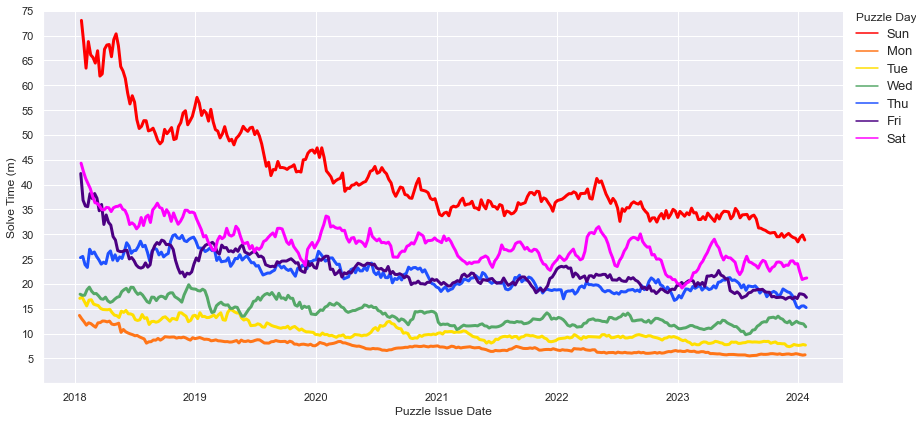

In [23]:
# Plot 10-puzzle moving average of GMS Solve Times by Day of Week
#Figure 3

sns.set(font_scale=1)

p = sns.relplot(
    data=df_GMS, marker = "", x="P_Date", y="GMST(m)_10p_MA", hue="DOW", hue_order=["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"], height=6, aspect=2, palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "indigo", "fuchsia"],
    kind="line", linewidth=3
).set(title="", 
    ylabel="Solve Time (m)",
    xlabel= "Puzzle Issue Date", yticks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], ylim=[0,75]
)

# Modify legend
leg = p._legend
leg.set_title("Puzzle Day")
leg.set_bbox_to_anchor([.88, .975])  # coordinates of lower left of bounding box
leg.get_title().set_fontsize(12)
leg._loc = 2  # if required you can set the loc
leg.get_texts()[0].set_fontsize(13)
leg.get_texts()[0].set_text('Sun')
leg.get_texts()[1].set_fontsize(13)
leg.get_texts()[1].set_text('Mon')
leg.get_texts()[2].set_fontsize(13)
leg.get_texts()[2].set_text('Tue')
leg.get_texts()[3].set_fontsize(13)
leg.get_texts()[3].set_text('Wed')
leg.get_texts()[4].set_fontsize(13)
leg.get_texts()[4].set_text('Thu')
leg.get_texts()[5].set_fontsize(13)
leg.get_texts()[5].set_text('Fri')
leg.get_texts()[6].set_fontsize(13)
leg.get_texts()[6].set_text('Sat')
leg._legend_box.align = "left"  # or left, or center

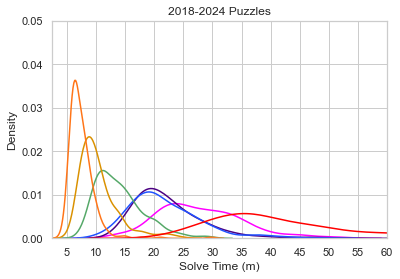

In [24]:
# Density Plot for Entire Sample Time Range (2018-2024)
# Figure 2

df_GMS['plot_seq_map'] = df_GMS['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})

sns.set(style="whitegrid")
ax = sns.kdeplot(data=df_GMS, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .05)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2018-2024 Puzzles')
ax.set_xlabel("Solve Time (m)")
plt.show()

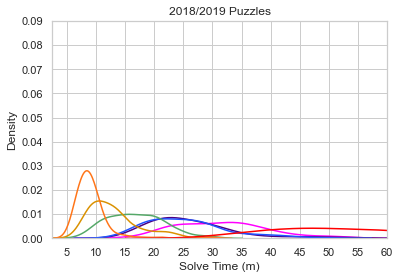

In [25]:
# Density Plot for 2018-2019 Only 
# Figure 3
df1_2018_19 = df_GMS.loc[(df_GMS["P_Yr"] == "2018") | (df_GMS["P_Yr"] == "2019")]

df1_2018_19['plot_seq_map'] = df1_2018_19['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})

sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_2018_19, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2018/2019 Puzzles')
ax.set_xlabel("Solve Time (m)")
plt.show()

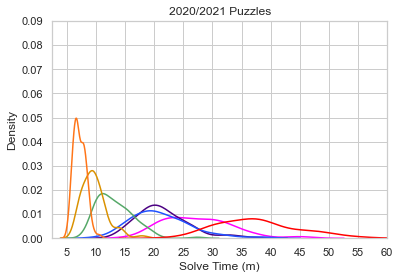

In [26]:
# Density Plot for 2020-2021 Only 
# Figure 3
df1_2020_21 = df_GMS.loc[(df_GMS["P_Yr"] == "2020") | (df_GMS["P_Yr"] == "2021")]

df1_2020_21['plot_seq_map'] = df1_2020_21['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_2020_21, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2020/2021 Puzzles')
ax.set_xlabel("Solve Time (m)")
plt.show()

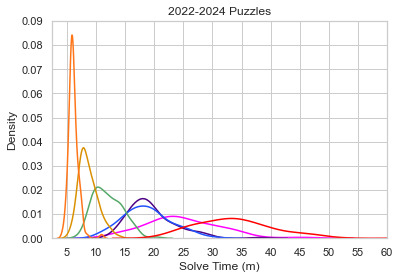

In [27]:
# Density Plot for 2022-2024 Only 
# Figure 3
df1_2022_24 = df_GMS.loc[(df_GMS["P_Yr"] == "2022") | (df_GMS["P_Yr"] == "2023") | (df_GMS["P_Yr"] == "2024")]

df1_2022_24['plot_seq_map'] = df1_2022_24['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_2022_24, x = "GMST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 40)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2022-2024 Puzzles')
ax.set_xlabel("Solve Time (m)")
plt.show()

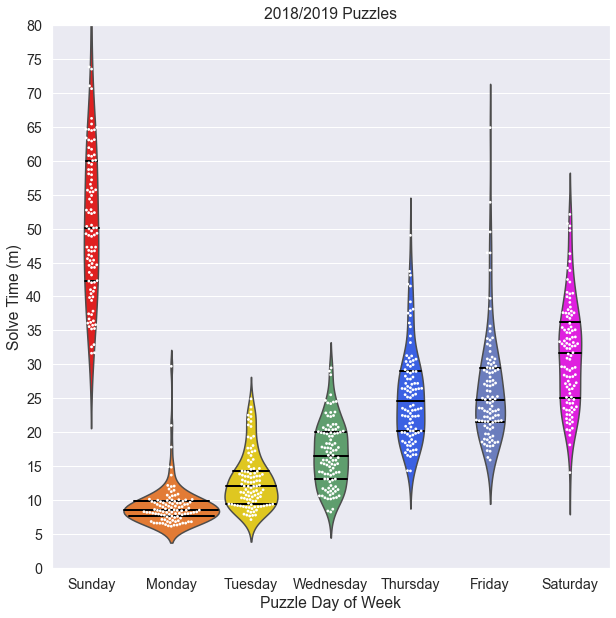

In [28]:
# Violin plots with swarm plot overlay by puzzle day 2018-2019 solves only

GMS_pre2020 = df_GMS.loc[(df_GMS["P_Yr"] == "2018") | (df_GMS["P_Yr"] == "2019")]

sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "GMST(m)", data=GMS_pre2020 , size=2.8 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(GMS_pre2020['DOW'], GMS_pre2020['GMST(m)'], width = 1.2, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 80)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2018/2019 Puzzles")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [29]:
GMS_pre2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1494 to 2213
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          730 non-null    datetime64[ns]
 1   P_Date_str                      730 non-null    object        
 2   P_Yr                            730 non-null    period[A-DEC] 
 3   2023+_puzzle                    730 non-null    float64       
 4   DOW                             730 non-null    object        
 5   DOW_num                         730 non-null    float64       
 6   GMST(m)                         730 non-null    float64       
 7   GMST(m)_10p_MA                  716 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA      730 non-null    int64         
 9   GMS_pds_l20_dw                  723 non-null    float64       
 10  GMST_Diff%_from_GMS_pds_l20_dw  723 non-null    float64       
 11  Gr

In [30]:
# Calculate Median and IQR per puzzle day, for 2018/2019 solves
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Sunday"), "GMST(m)"].describe().round(1))
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Monday"), "GMST(m)"].describe().round(1))
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Tuesday"), "GMST(m)"].describe().round(1))
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Wednesday"), "GMST(m)"].describe().round(1))
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Thursday"), "GMST(m)"].describe().round(1))
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Friday"), "GMST(m)"].describe().round(1))
print(GMS_pre2020.loc[(GMS_pre2020["DOW"] == "Saturday"), "GMST(m)"].describe().round(1))

count    104.0
mean      52.4
std       14.1
min       31.6
25%       42.3
50%       50.0
75%       60.0
max      110.7
Name: GMST(m), dtype: float64
count    105.0
mean       9.2
std        3.1
min        6.2
25%        7.6
50%        8.6
75%        9.8
max       29.7
Name: GMST(m), dtype: float64
count    105.0
mean      12.9
std        4.1
min        7.2
25%        9.5
50%       12.1
75%       14.3
max       24.9
Name: GMST(m), dtype: float64
count    104.0
mean      16.8
std        4.8
min        8.3
25%       13.1
50%       16.5
75%       20.1
max       29.5
Name: GMST(m), dtype: float64
count    104.0
mean      25.5
std        7.0
min       14.3
25%       20.2
50%       24.6
75%       29.0
max       49.0
Name: GMST(m), dtype: float64
count    104.0
mean      26.5
std        8.2
min       15.9
25%       21.6
50%       24.7
75%       29.5
max       64.8
Name: GMST(m), dtype: float64
count    104.0
mean      31.5
std        7.8
min       14.1
25%       25.1
50%       31.6
75%       

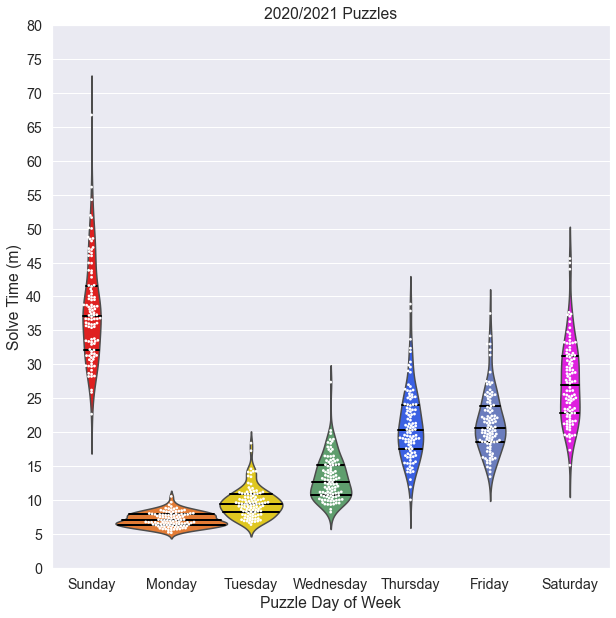

In [31]:
# Violin plots with swarm plot overlay by puzzle day 2020/2021 solves only

GMS_2020_21 = df_GMS.loc[(df_GMS["P_Yr"] == "2020") | (df_GMS["P_Yr"] == "2021")]

sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "GMST(m)",data=GMS_2020_21 , size=2.8 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(GMS_2020_21['DOW'], GMS_2020_21['GMST(m)'], width = 1.4, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 80)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2020/2021 Puzzles")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [32]:
# Calculate Median and IQR per puzzle day, for 2020-2021 solves
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Sunday"), "GMST(m)"].describe().round(1))
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Monday"), "GMST(m)"].describe().round(1))
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Tuesday"), "GMST(m)"].describe().round(1))
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Wednesday"), "GMST(m)"].describe().round(1))
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Thursday"), "GMST(m)"].describe().round(1))
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Friday"), "GMST(m)"].describe().round(1))
print(GMS_2020_21.loc[(GMS_2020_21["DOW"] == "Saturday"), "GMST(m)"].describe().round(1))

count    104.0
mean      37.9
std        7.4
min       22.7
25%       32.2
50%       37.1
75%       41.5
max       66.7
Name: GMST(m), dtype: float64
count    104.0
mean       7.2
std        1.0
min        5.2
25%        6.4
50%        7.1
75%        7.9
max       10.6
Name: GMST(m), dtype: float64
count    104.0
mean       9.7
std        2.2
min        6.4
25%        8.2
50%        9.5
75%       10.9
max       18.4
Name: GMST(m), dtype: float64
count    105.0
mean      13.3
std        3.2
min        8.3
25%       10.8
50%       12.7
75%       15.2
max       27.4
Name: GMST(m), dtype: float64
count    105.0
mean      21.1
std        5.2
min       10.1
25%       17.6
50%       20.3
75%       24.1
max       38.9
Name: GMST(m), dtype: float64
count    105.0
mean      21.5
std        4.5
min       13.5
25%       18.6
50%       20.7
75%       23.9
max       37.5
Name: GMST(m), dtype: float64
count    104.0
mean      27.3
std        5.9
min       15.2
25%       22.8
50%       26.9
75%       

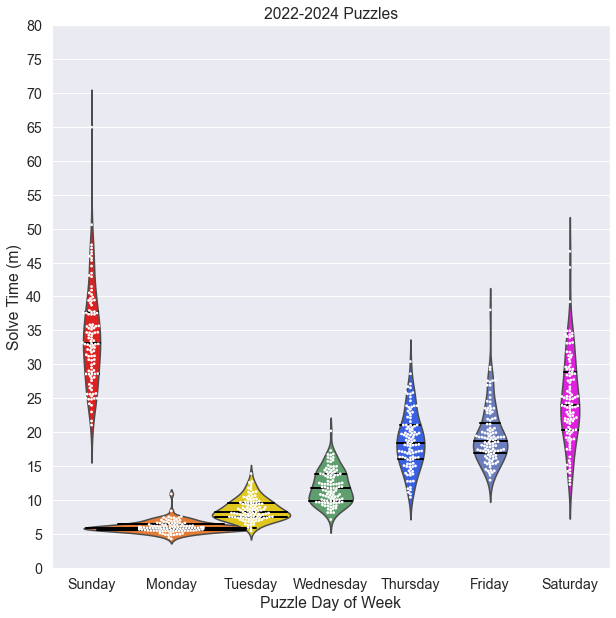

In [33]:
# Violin plots with swarm plot overlay by puzzle day -2022-2024

GMS_2022_24 = df_GMS.loc[(df_GMS["P_Yr"] == "2022") | (df_GMS["P_Yr"] == "2023") | (df_GMS["P_Yr"] == "2024")]

sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "GMST(m)",data=GMS_2022_24 , size=2.8, order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(GMS_2022_24['DOW'], GMS_2022_24['GMST(m)'], width = 2.2, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 80)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2022-2024 Puzzles")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [34]:
# Calculate Median and IQR per puzzle day, for 2022/2024
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Sunday"), "GMST(m)"].describe().round(1))
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Monday"), "GMST(m)"].describe().round(1))
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Tuesday"), "GMST(m)"].describe().round(1))
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Wednesday"), "GMST(m)"].describe().round(1))
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Thursday"), "GMST(m)"].describe().round(1))
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Friday"), "GMST(m)"].describe().round(1))
print(GMS_2022_24.loc[(GMS_2022_24["DOW"] == "Saturday"), "GMST(m)"].describe().round(1))

count    108.0
mean      33.9
std        7.1
min       21.1
25%       28.6
50%       33.2
75%       37.7
max       64.9
Name: GMST(m), dtype: float64
count    108.0
mean       6.1
std        0.9
min        4.3
25%        5.6
50%        6.0
75%        6.4
max       11.0
Name: GMST(m), dtype: float64
count    108.0
mean       8.7
std        1.6
min        5.5
25%        7.5
50%        8.3
75%        9.6
max       13.9
Name: GMST(m), dtype: float64
count    108.0
mean      12.0
std        2.5
min        7.2
25%       10.0
50%       11.8
75%       13.9
max       20.2
Name: GMST(m), dtype: float64
count    108.0
mean      18.7
std        4.1
min       10.4
25%       16.1
50%       18.4
75%       21.1
max       30.4
Name: GMST(m), dtype: float64
count    108.0
mean      19.5
std        4.1
min       13.0
25%       16.9
50%       18.8
75%       21.4
max       38.0
Name: GMST(m), dtype: float64
count    109.0
mean      24.8
std        6.4
min       12.4
25%       20.4
50%       24.0
75%       

### Constructor Analysis
Which constructors does the GMS struggle against? Which ones does the GMS do well against? This analysis is with respect to average deviation for solve performance on given puzzle from recent (time-weighted) performance per constructor/constructor team. 

In [35]:
#Get by-constructor performance stats for Global Median Solver
constructor_avgs_GMS = df_GMS.groupby(['Constructors'])['GMST_Diff%_from_GMS_pds_l20_dw'].agg(constructor_mean_GMS=(np.mean), puzzle_count_GMS=(np.count_nonzero))
constructor_avgs_GMS["constructor_mean_GMS"] = constructor_avgs_GMS["constructor_mean_GMS"].round(2)

puzzle_min_threshold = 5 #min number of puzzles in sample for constructor/constructor team to be kept in the analysis 

# Pare down to only constructor(s) with at least n puzzles for which GMS has completed
constructor_avgs_filter = constructor_avgs_GMS.loc[constructor_avgs_GMS['puzzle_count_GMS'] >= puzzle_min_threshold] 

In [36]:
constructor_avgs_filter.head(35)

constructor_mean_GMS  \
Constructors                                                       
Adam Aaronson                                             -14.14   
Adam Wagner                                                -0.69   
Adrian Johnson                                             -4.42   
Aimee Lucido                                              -12.58   
Alan Arbesfeld                                             15.23   
Alex Bajcz                                                -10.57   
Alex Eaton-Salners                                          9.44   
Alex Vratsanos                                             12.91   
Amanda Chung and Karl Ni                                  -13.04   
Andrea Carla Michaels and Kevin Christian                  -4.31   
Andrew Kingsley                                           -14.14   
Andrew Ries                                                 7.10   
Andy Kravis                                               -13.77   
Barbara Lin                                               -10.48   
Billy Bratton                                             -17.21   
Blake Slonecker                                            -8.42   
Brad Wiegmann                                               9.53   
Brandon Koppy                                               0.54   
Brendan Emmett Quigley                                     14.48   
Brian Thomas                                              -16.06   
Bruce Haight                                                6.93   
Byron Walden                                                9.48   
Caitlin Reid                                              -15.25   
Christina Iverson                                          -9.10   
Christopher Adams                                         -11.84   
Damon Gulczynski                                           -3.20   
Dan Schoenholz                                             -1.69   
Daniel Larsen                                              -7.06   
Daniel Mauer                                               12.30   
David Distenfeld                                          -12.20   
David J. Kahn                                              14.58   
David Steinberg                                            -2.82   
David Tuffs                                               -17.80   
Drew Schmenner                                              3.49   
Ed Sessa                                                   -7.91   

                                            puzzle_count_GMS  
Constructors                                                  
Adam Aaronson                                            8.0  
Adam Wagner                                             14.0  
Adrian Johnson                                           5.0  
Aimee Lucido                                             9.0  
Alan Arbesfeld                                          12.0  
Alex Bajcz                                               5.0  
Alex Eaton-Salners                                      38.0  
Alex Vratsanos                                           5.0  
Amanda Chung and Karl Ni                                10.0  
Andrea Carla Michaels and Kevin Christian                5.0  
Andrew Kingsley                                          7.0  
Andrew Ries                                             16.0  
Andy Kravis                                              7.0  
Barbara Lin                                             11.0  
Billy Bratton                                            5.0  
Blake Slonecker                                          6.0  
Brad Wiegmann                                            6.0  
Brandon Koppy                                           15.0  
Brendan Emmett Quigley                                  10.0  
Brian Thomas                                             7.0  
Bruce Haight                                            26.0  
Byron Walden                                            18.0  
Caitlin Reid   

In [37]:
constructor_avgs_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, Adam Aaronson to Zhouqin Burnikel
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructor_mean_GMS  115 non-null    float64
 1   puzzle_count_GMS      115 non-null    float64
dtypes: float64(2)
memory usage: 2.7+ KB


In [38]:
constructor_avgs_filter.to_csv('../data/constructor_avgs_filter.csv', index=True)

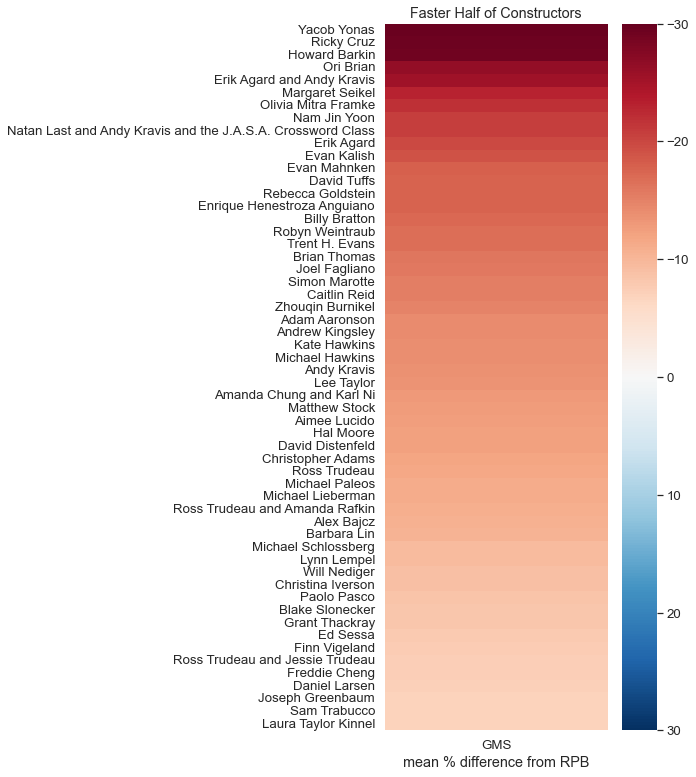

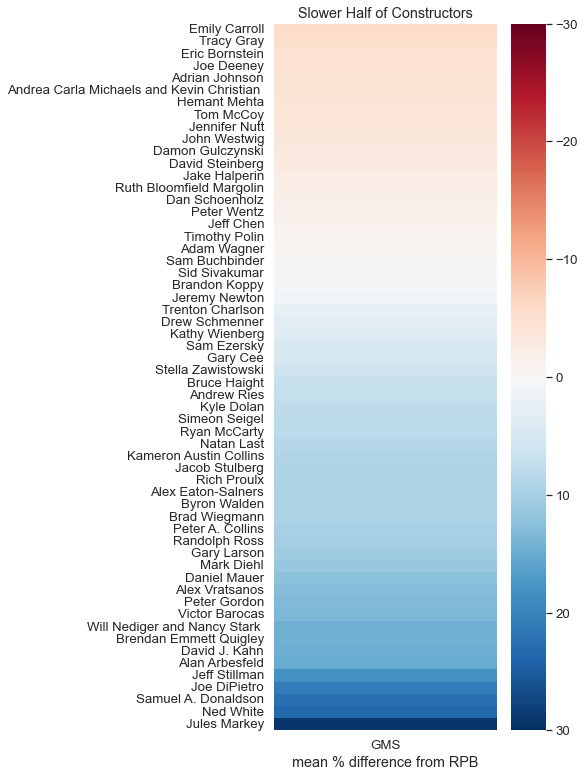

In [39]:
# Construct Heat Map sorted by fastest constructor relative to GMS 10 puzzle moving average to slowest

#Remove puzzle ns columns and sort for heatmapping
avgs = constructor_avgs_filter[["constructor_mean_GMS"]]
avgs = avgs.sort_values(by=['constructor_mean_GMS'], ascending = True)

first_half_end = int((len(avgs)/2)-1)
avgs_end = int(len(avgs))
first_half = avgs[0:first_half_end]
second_half = avgs[(first_half_end+1):avgs_end]

first_half = first_half.sort_values(by=['constructor_mean_GMS'], ascending = True)
plt.figure(figsize=(5,13))
sns.set(font_scale=1.2)
ax = sns.heatmap(first_half, xticklabels=['GMS'], cmap="RdBu", vmin=-30, vmax=30, yticklabels=True)
plt.gcf().axes[1].invert_yaxis() #flip color bar to show fastest at the top
plt.xlabel('mean % difference from RPB')
plt.ylabel('')
plt.title("Faster Half of Constructors")
plt.show()

second_half = second_half.sort_values(by=['constructor_mean_GMS'], ascending = True)
plt.figure(figsize=(5,13))
sns.set(font_scale=1.2)
ax2 = sns.heatmap(second_half, xticklabels=['GMS'], cmap="RdBu",vmin=-30, vmax=30, yticklabels=True)
plt.gcf().axes[1].invert_yaxis() #flip color bar to show fastest at the top
plt.xlabel('mean % difference from RPB')
plt.ylabel('')
plt.title("Slower Half of Constructors")
plt.show()

In [40]:
print(constructor_avgs_filter[["constructor_mean_GMS"]].agg(['min', 'max']))

     constructor_mean_GMS
min                -29.72
max                 29.23


#### Figure 6: "Prediction" of Next Performance vs a Constructor Based on Previous at Different Inclusion Thresholds

In [41]:
# Calculate past performance (using COMP date to sort) for GMS against a given constructor (% difference from RPB) for each puzzle in sample
# GMS mean past performance versus a given constructor(s), per puzzle. 
# This is calculated off of deviation from RPB, so that it can be collapsed across puzzle days
# Getting the count as well will allow filtering by past number of puzzles for a second and third version of the figure

df_GMS = df_GMS.sort_values(by=['Constructors','P_Date'], ascending = False)

df_GMS = df_GMS.iloc[::-1]
df_GMS['GMS_per_constr_avg_past_diff_from_RPB'] = df_GMS.groupby(['Constructors'])['GMST_Diff%_from_GMS_pds_l20_dw'].transform(lambda x: x.rolling(window=100, min_periods = 1).mean().round(2).shift(1))
df_GMS['GMS_per_constr_past_diff_from_RPB_ct'] = df_GMS.groupby(['Constructors'])['GMST_Diff%_from_GMS_pds_l20_dw'].transform(lambda x: x.rolling(window=100, min_periods = 1).count().shift(1))
df_GMS = df_GMS.iloc[::-1]

# col = df_GMS.pop('GMS_per_constr_avg_past_diff_from_10pMA')
# df_GMS.insert(17, col.name, col)

In [42]:
# Checkpoint
df_GMS.to_csv('../data/df_GMS.csv', index=False)

In [43]:
# Create df that includes only puzzles with Constructor(s) where there are >=1 prior puzzles by them
df_GMS_filter = df_GMS.loc[(df_GMS["GMS_per_constr_past_diff_from_RPB_ct"] >= 1)]
df_GMS_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 113 to 332
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 1470 non-null   datetime64[ns]
 1   P_Date_str                             1470 non-null   object        
 2   P_Yr                                   1470 non-null   period[A-DEC] 
 3   2023+_puzzle                           1470 non-null   float64       
 4   DOW                                    1470 non-null   object        
 5   DOW_num                                1470 non-null   float64       
 6   GMST(m)                                1470 non-null   float64       
 7   GMST(m)_10p_MA                         1470 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA             1470 non-null   int64         
 9   GMS_pds_l20_dw                         1470 non-null   float64

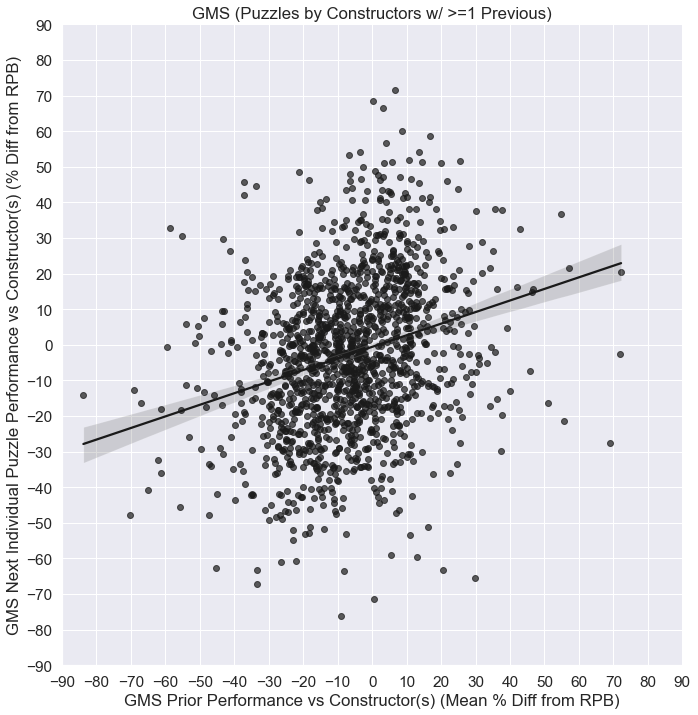

In [44]:
#Plot GMS_per_constr_avg_past_diff_from_RPB vs GMST_Diff%_from_GMS_pds_l20_dw for all puzzles whose constructor had at least 3 prior puzzles in the sample
# Idea here GMS to get correlation between past performance vs a given constructor and performance on a given puzzle, in a way that GMS normalized for both puzzle day difficulty and recent past performance

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=df_GMS_filter, x="GMS_per_constr_avg_past_diff_from_RPB", y="GMST_Diff%_from_GMS_pds_l20_dw",
    height=10, aspect=1, legend=False, scatter_kws = {"color": "k", "alpha": 0.7}, line_kws = {"color": "k"}
).set(title="GMS (Puzzles by Constructors w/ >=1 Previous)", xlabel= "GMS Prior Performance vs Constructor(s) (Mean % Diff from RPB)",
    ylabel="GMS Next Individual Puzzle Performance vs Constructor(s) (% Diff from RPB)", xticks =[-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], yticks =[-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
)

# #Adjust subplots individually
_= p.set(ylim=(-90, 90))
_= p.set(xlim=(-90, 90))

In [45]:
# Correlation Calculation (Pearson r)
print(df_GMS_filter['GMS_per_constr_avg_past_diff_from_RPB'].corr(df_GMS_filter['GMST_Diff%_from_GMS_pds_l20_dw']))

0.26575069395585926


In [46]:
# Create df that includes only puzzles with Constructor(s) where there are >=4 prior puzzles by them
df_GMS_filter = df_GMS.loc[(df_GMS["GMS_per_constr_past_diff_from_RPB_ct"] >= 4)]
df_GMS_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 725 to 761
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 749 non-null    datetime64[ns]
 1   P_Date_str                             749 non-null    object        
 2   P_Yr                                   749 non-null    period[A-DEC] 
 3   2023+_puzzle                           749 non-null    float64       
 4   DOW                                    749 non-null    object        
 5   DOW_num                                749 non-null    float64       
 6   GMST(m)                                749 non-null    float64       
 7   GMST(m)_10p_MA                         749 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             749 non-null    int64         
 9   GMS_pds_l20_dw                         749 non-null    float64 

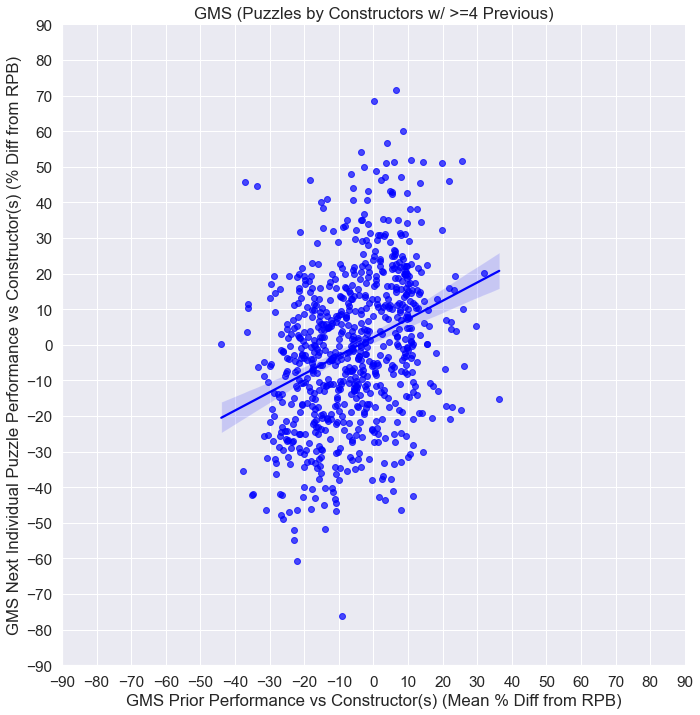

In [47]:
#Plot GMS_per_constr_avg_past_diff_from_10pMA vs diff%_from_10pMA(GMS) for all puzzles whose constructor had at least 3 prior puzzles in the sample
# Idea here GMS to get correlation between past performance vs a given constructor and performance on a given puzzle, in a way that GMS normalized for both puzzle day difficulty and recent past performance

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=df_GMS_filter, x="GMS_per_constr_avg_past_diff_from_RPB", y="GMST_Diff%_from_GMS_pds_l20_dw",
    height=10, aspect=1, legend=False, scatter_kws = {"color": "blue", "alpha": 0.7}, line_kws = {"color": "blue"}
).set(title="GMS (Puzzles by Constructors w/ >=4 Previous)", xlabel= "GMS Prior Performance vs Constructor(s) (Mean % Diff from RPB)",
    ylabel="GMS Next Individual Puzzle Performance vs Constructor(s) (% Diff from RPB)", xticks =[-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], yticks =[-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
)

# #Adjust subplots individually
_= p.set(ylim=(-90, 90))
_= p.set(xlim=(-90, 90))

In [48]:
# Correlation Calculation (Pearson r)
print(df_GMS_filter['GMS_per_constr_avg_past_diff_from_RPB'].corr(df_GMS_filter['GMST_Diff%_from_GMS_pds_l20_dw']))

0.312730667961466


### Correlation of Puzzle, Answer and Past Performance Feature Parameters to Individual IS2 Puzzle Solve Times 

In [49]:
# Make a deep copy of individual solver df
GMS_df3 = df_GMS.copy()

In [50]:
GMS_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 113 to 866
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 2218 non-null   datetime64[ns]
 1   P_Date_str                             2218 non-null   object        
 2   P_Yr                                   2218 non-null   period[A-DEC] 
 3   2023+_puzzle                           2218 non-null   float64       
 4   DOW                                    2218 non-null   object        
 5   DOW_num                                2218 non-null   float64       
 6   GMST(m)                                2218 non-null   float64       
 7   GMST(m)_10p_MA                         2204 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA             2218 non-null   int64         
 9   GMS_pds_l20_dw                         2211 non-null   float64

In [51]:
GMS_df3a.to_csv('../data/GMS_df3a.csv', index=False)

NameError: name 'GMS_df3a' is not defined

In [51]:
# Restricting time range to beginning of 2019 onward to minimize baseline shift effects on correlations to puzzle features

GMS_df4 = GMS_df3.loc[(GMS_df3["P_Yr"]==("2019")) | (GMS_df3["P_Yr"]==("2020")) | (GMS_df3["P_Yr"]==("2021")) |(GMS_df3["P_Yr"]==("2022")) | (GMS_df3["P_Yr"]==("2023")) | (GMS_df3["P_Yr"]==("2024"))]
#GMS_df4 = GMS_df3.loc[(GMS_df3["P_Yr"]==("2020")) | (GMS_df3["P_Yr"]==("2021")) |(GMS_df3["P_Yr"]==("2022")) | (GMS_df3["P_Yr"]==("2023")) | (GMS_df3["P_Yr"]==("2024"))]
# #print(df_IS1.loc[df_IS1["Comp_Yr"]==("2021"), "IST(m)"].sum())

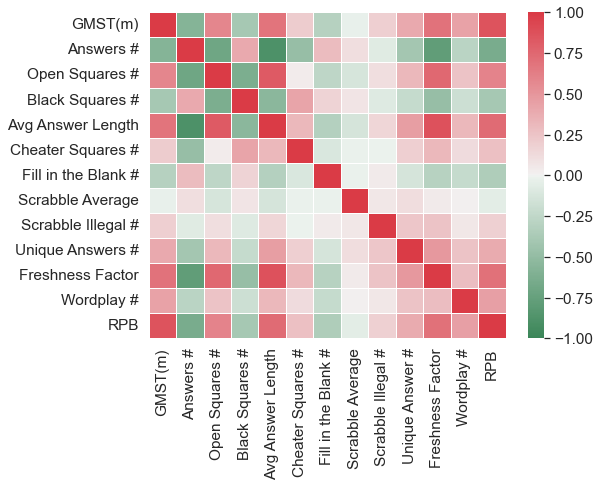

In [52]:
# 15x15 Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_15x15 = GMS_df4.loc[GMS_df4["DOW"]!=("Sunday")]
puzzle_features = GMS_15x15[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',    
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'GMS_pds_l20_dw': 'RPB'
}

corr = corr.rename(labels)

# remove the top right triangle - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #','RPB'])
#_= ans.set_yticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Average Answer Length', 'Rebus #', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Recent Adj Perf', 'Past Perf vs Constructor(s)'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

In [53]:
GMS_15x15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 113 to 866
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 1589 non-null   datetime64[ns]
 1   P_Date_str                             1589 non-null   object        
 2   P_Yr                                   1589 non-null   period[A-DEC] 
 3   2023+_puzzle                           1589 non-null   float64       
 4   DOW                                    1589 non-null   object        
 5   DOW_num                                1589 non-null   float64       
 6   GMST(m)                                1589 non-null   float64       
 7   GMST(m)_10p_MA                         1589 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA             1589 non-null   int64         
 9   GMS_pds_l20_dw                         1589 non-null   float64

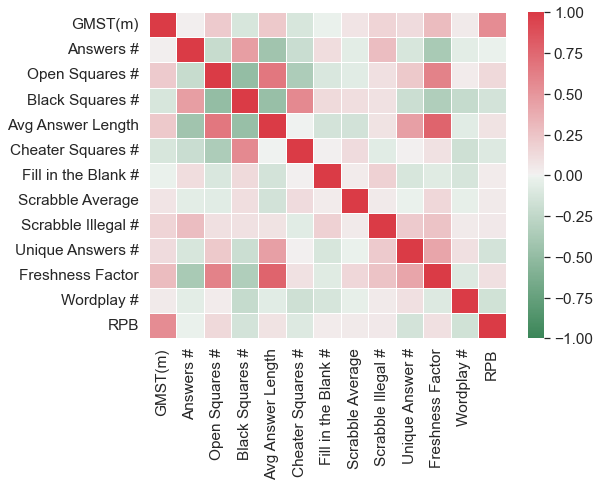

In [64]:
# 21x21 (Sunday) Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_21x21 = GMS_df4.loc[GMS_df4["DOW"]==("Sunday")]
puzzle_features = GMS_21x21[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',     
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'GMS_pds_l20_dw': 'RPB'    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

In [55]:
GMS_21x21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1847 to 1784
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 264 non-null    datetime64[ns]
 1   P_Date_str                             264 non-null    object        
 2   P_Yr                                   264 non-null    period[A-DEC] 
 3   2023+_puzzle                           264 non-null    float64       
 4   DOW                                    264 non-null    object        
 5   DOW_num                                264 non-null    float64       
 6   GMST(m)                                264 non-null    float64       
 7   GMST(m)_10p_MA                         264 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             264 non-null    int64         
 9   GMS_pds_l20_dw                         264 non-null    float6

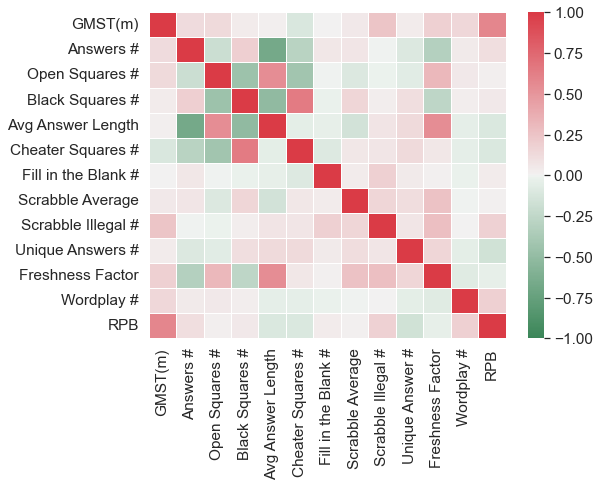

In [56]:
# Monday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_df4_Mon = GMS_df4.loc[GMS_df4["DOW"]==("Monday")]
puzzle_features = GMS_df4_Mon[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'GMS_pds_l20_dw': 'RPB',    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

In [57]:
GMS_df4_Mon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 145 to 866
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 264 non-null    datetime64[ns]
 1   P_Date_str                             264 non-null    object        
 2   P_Yr                                   264 non-null    period[A-DEC] 
 3   2023+_puzzle                           264 non-null    float64       
 4   DOW                                    264 non-null    object        
 5   DOW_num                                264 non-null    float64       
 6   GMST(m)                                264 non-null    float64       
 7   GMST(m)_10p_MA                         264 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             264 non-null    int64         
 9   GMS_pds_l20_dw                         264 non-null    float64 

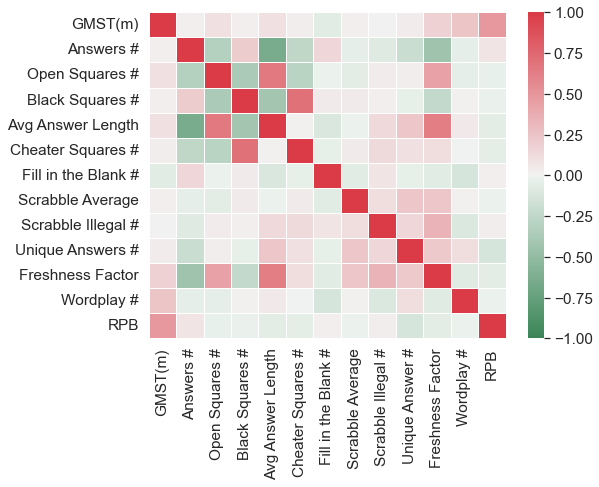

In [58]:
# Tuesday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_df4_Tue = GMS_df4.loc[GMS_df4["DOW"]==("Tuesday")]
puzzle_features = GMS_df4_Tue[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay': 'Wordplay #',
'GMS_pds_l20_dw': 'RPB'    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

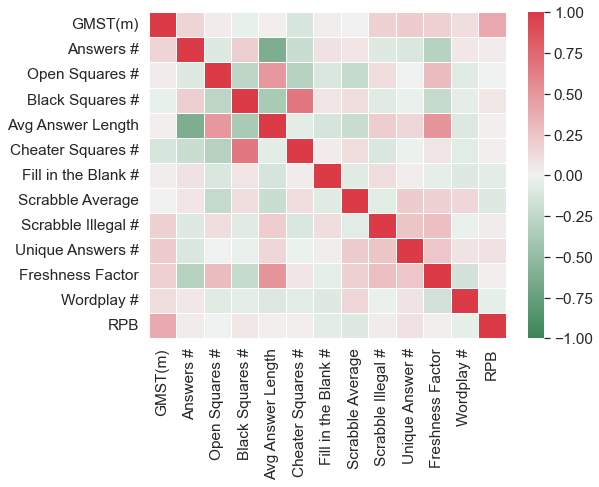

In [59]:
# Wednesday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_df4_Wed = GMS_df4.loc[GMS_df4["DOW"]==("Wednesday")]
puzzle_features = GMS_df4_Wed[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay': 'Wordplay #',
'GMS_pds_l20_dw': 'RPB'
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

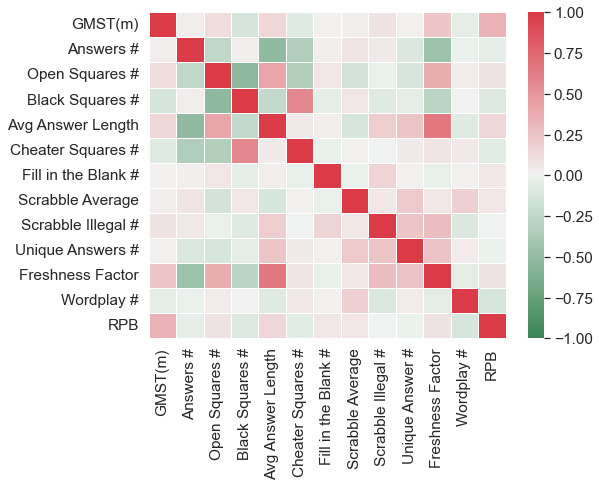

In [60]:
# Thursday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_df4_Thurs = GMS_df4.loc[GMS_df4["DOW"]==("Thursday")]
puzzle_features = GMS_df4_Thurs[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length', 
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'GMS_pds_l20_dw': 'RPB',    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])
#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

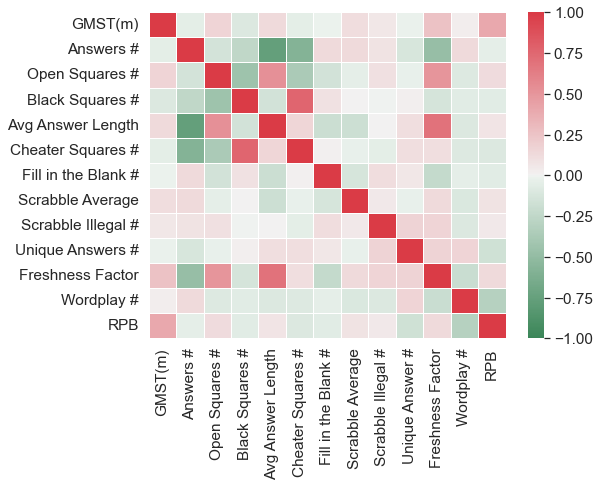

In [61]:
# Friday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_df4_Fri = GMS_df4.loc[GMS_df4["DOW"]==("Friday")]
puzzle_features = GMS_df4_Fri[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'GMS_pds_l20_dw': 'RPB'
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

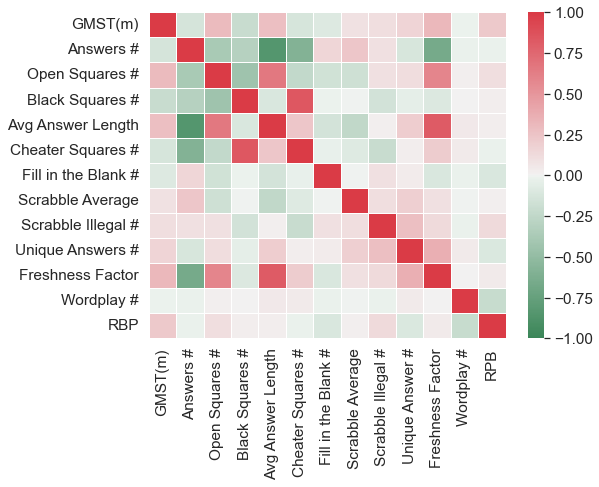

In [62]:
# Saturday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

GMS_df4_Sat = GMS_df4.loc[GMS_df4["DOW"]==("Saturday")]
puzzle_features = GMS_df4_Sat[["GMST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "GMS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'GMST(m)':'GMST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill in the Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'GMS_pds_l20_dw': 'RBP'
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['GMST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

### Scatterplots of Relationship of Grid, Answer and Past-Performance Parameters to GMS Per Puzzle Performance

In [63]:
GMS_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 113 to 866
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 1853 non-null   datetime64[ns]
 1   P_Date_str                             1853 non-null   object        
 2   P_Yr                                   1853 non-null   period[A-DEC] 
 3   2023+_puzzle                           1853 non-null   float64       
 4   DOW                                    1853 non-null   object        
 5   DOW_num                                1853 non-null   float64       
 6   GMST(m)                                1853 non-null   float64       
 7   GMST(m)_10p_MA                         1853 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA             1853 non-null   int64         
 9   GMS_pds_l20_dw                         1853 non-null   float64

In [65]:
# Create new df with all 15x15 puzzle rows copied and placed below current rows. 
# This is so we can plot all 15x15 data together as a subplot in the feature correlation scatterplot figures 

GMS_df4_copy = GMS_df4.loc[(GMS_df4["DOW_num"] != 1)] #15x15 only
GMS_df4_copy["DOW_num"] = 0

GMS_df4a = pd.concat([GMS_df4, GMS_df4_copy],ignore_index=True)

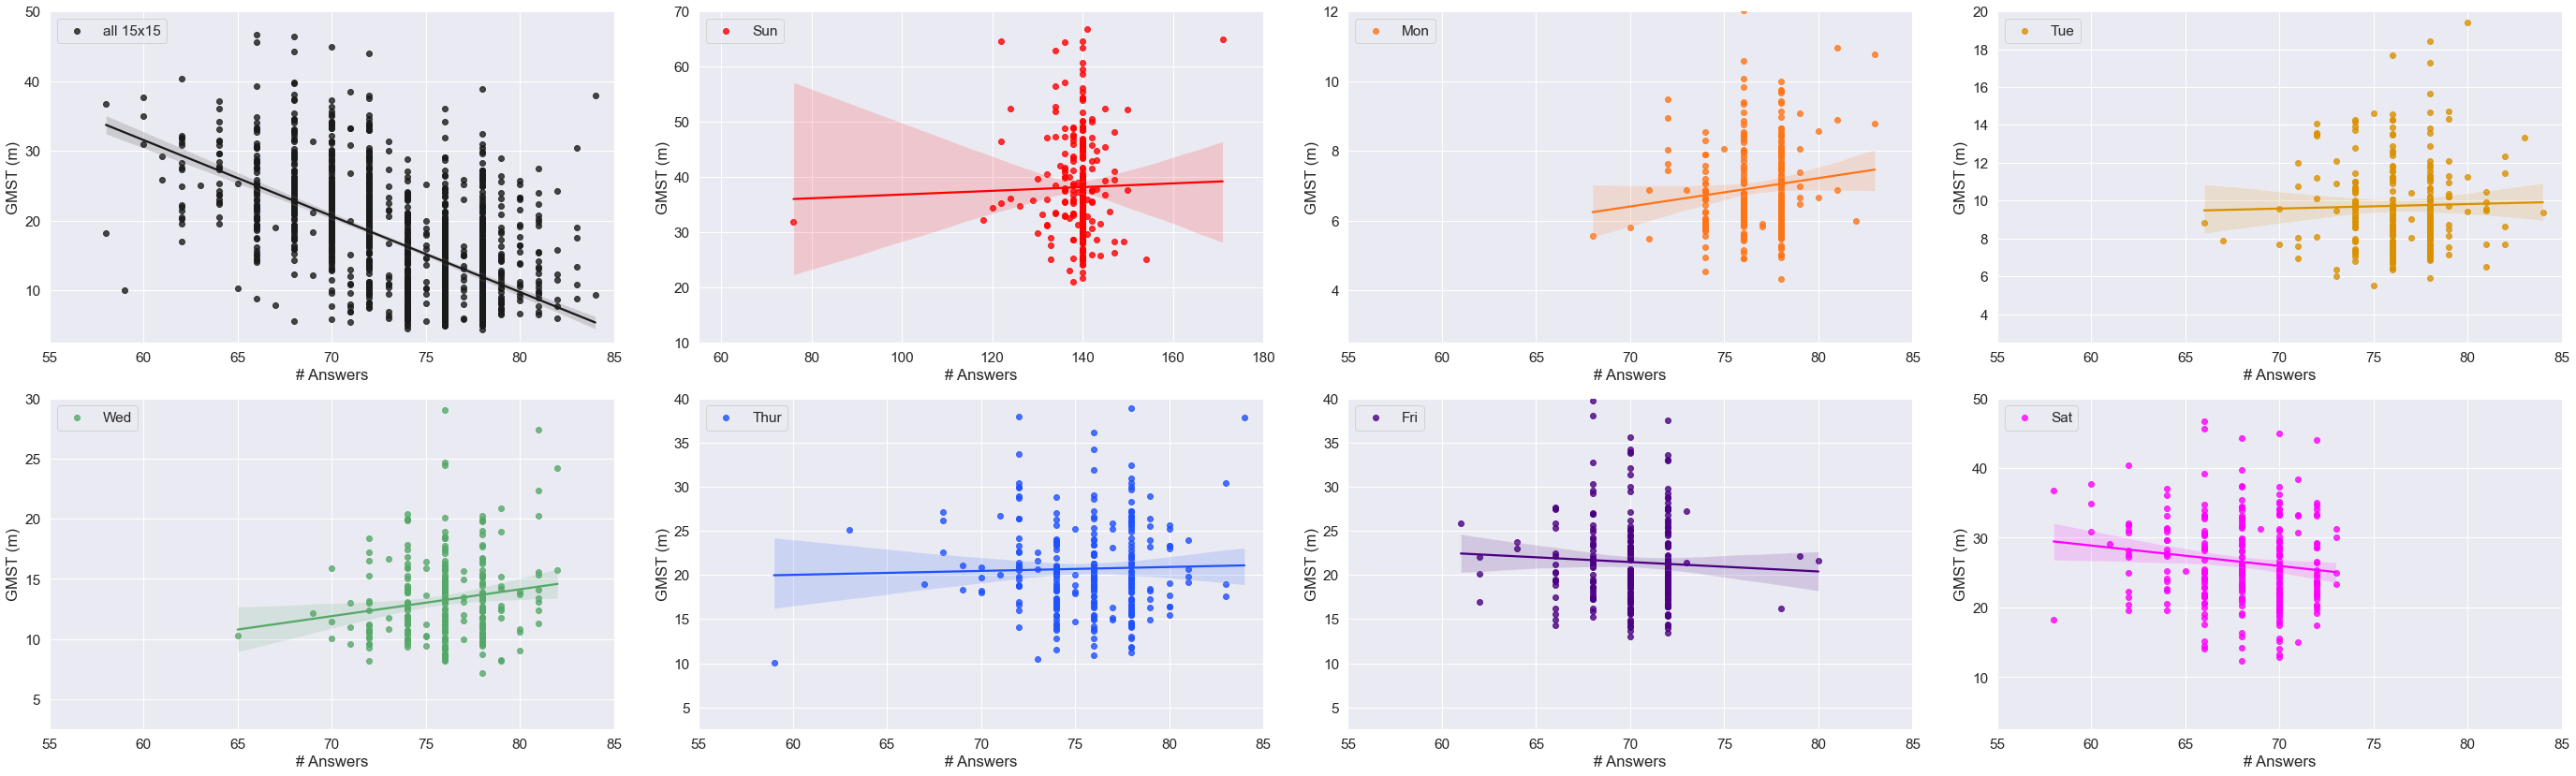

In [66]:
# Number of Answers vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Words", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Answers",
    ylabel="GMST (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((55,85))
p.axes[1].set_xlim((55,180))
p.axes[2].set_xlim((55,85))
p.axes[3].set_xlim((55,85))
p.axes[4].set_xlim((55,85))
p.axes[5].set_xlim((55,85))
p.axes[6].set_xlim((55,85))
p.axes[7].set_xlim((55,85))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [67]:
# Calculate GMS Pearson R for 15x15 grids for this feature
GMS_15x15 = GMS_df4.loc[GMS_df4["DOW"]!=("Sunday")] #only need to filter down this one time, and can apply to correlations for all subsequent features analysed

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Words']))

-0.5745538225776317


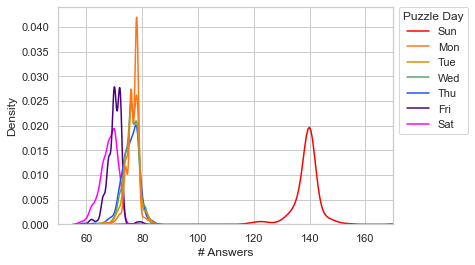

In [68]:
# Density plot of number of answers in puzzles solved by GMS
GMS_df4['plot_seq_map'] = GMS_df4['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Words", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(50, 170)
ax.set_xlabel("# Answers")
plt.show()

In [69]:
GMS_df4["Words"].agg(['min', 'max'])

min     58
max    171
Name: Words, dtype: int64

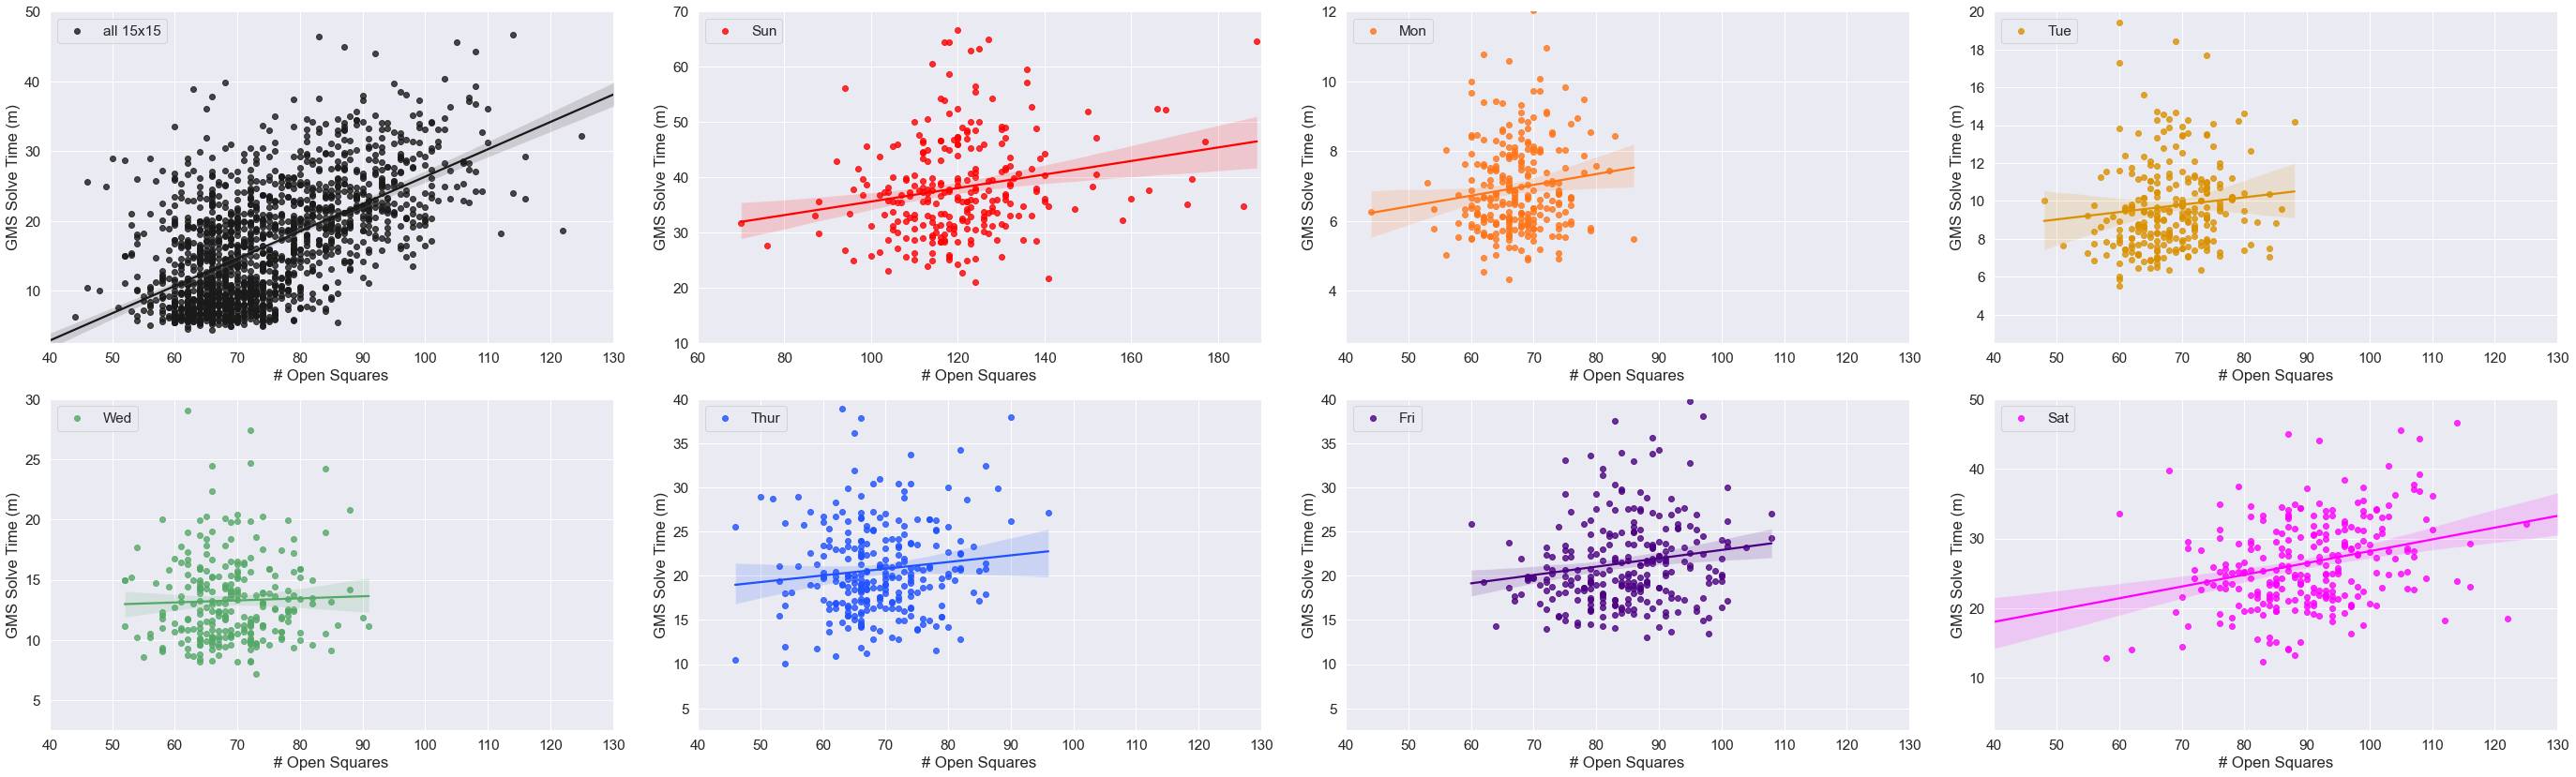

In [70]:
# Open Squares vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Open_Squares", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Open Squares",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((40,130))
p.axes[1].set_xlim((60,190))
p.axes[2].set_xlim((40,130))
p.axes[3].set_xlim((40,130))
p.axes[4].set_xlim((40,130))
p.axes[5].set_xlim((40,130))
p.axes[6].set_xlim((40,130))
p.axes[7].set_xlim((40,130))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [71]:
# Calculate GMS Pearson R for 15x15 grids for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Open_Squares']))

0.5837368506153624


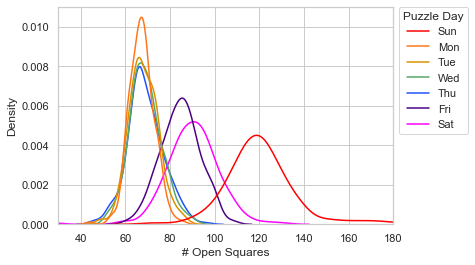

In [72]:
# Density plot of number of open squares in puzzles solved by GMS

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Open_Squares", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(30, 180)
ax.set_xlabel("# Open Squares")
plt.show()

In [73]:
GMS_df4["Open_Squares"].agg(['min', 'max'])

min     29
max    189
Name: Open_Squares, dtype: int64

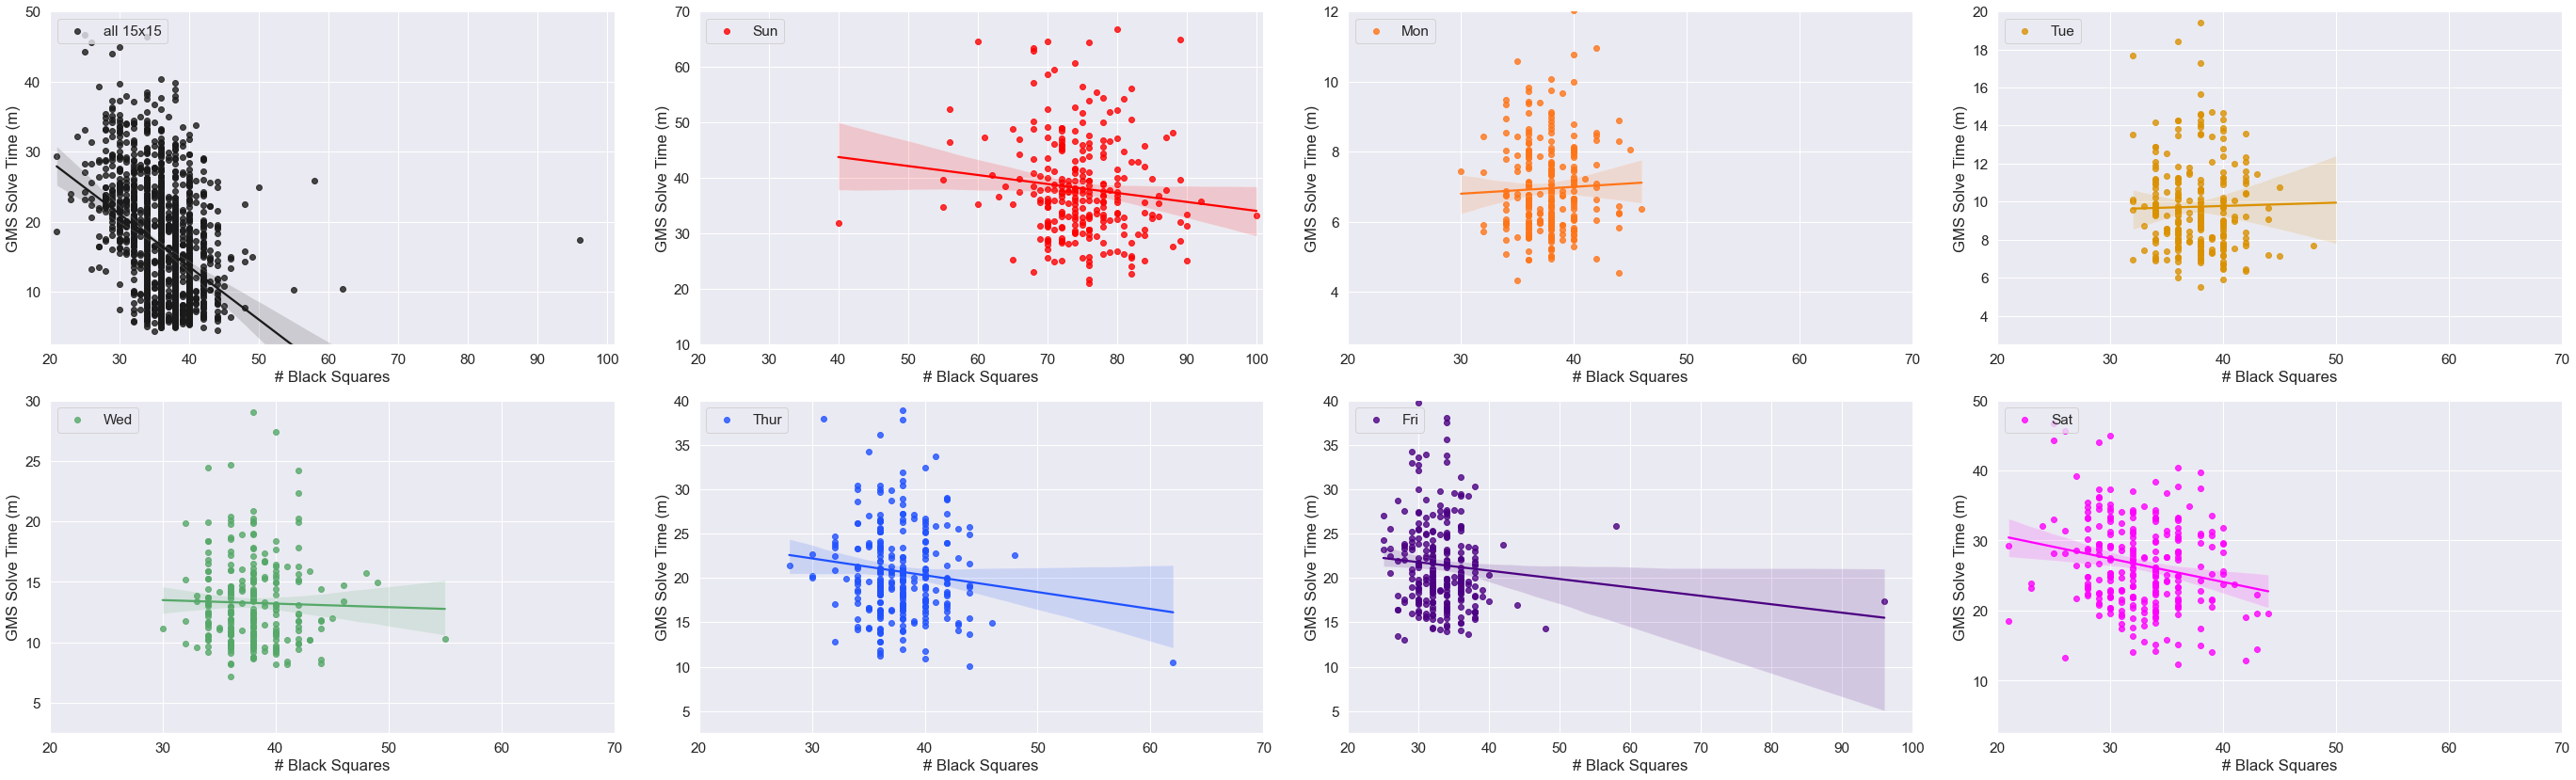

In [74]:
# Black Squares (blocks) vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Blocks", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Black Squares",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((20,101))
p.axes[1].set_xlim((20,101))
p.axes[2].set_xlim((20,70))
p.axes[3].set_xlim((20,70))
p.axes[4].set_xlim((20,70))
p.axes[5].set_xlim((20,70))
p.axes[6].set_xlim((20,100))
p.axes[7].set_xlim((20,70))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [75]:
# Calculate Pearson R for GMS 15x15 grids for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Blocks']))

-0.3946451227258291


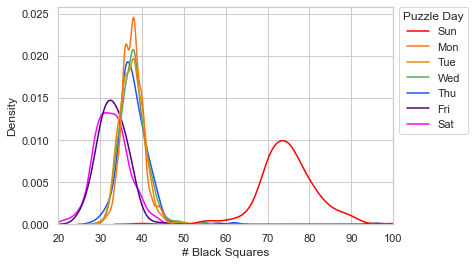

In [76]:
# Density plot of number of black squares (blocks) in puzzles solved by GMS
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Blocks", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(20, 100)
ax.set_xlabel("# Black Squares")
plt.show()

In [77]:
GMS_df4["Blocks"].agg(['min', 'max'])

min     21
max    100
Name: Blocks, dtype: int64

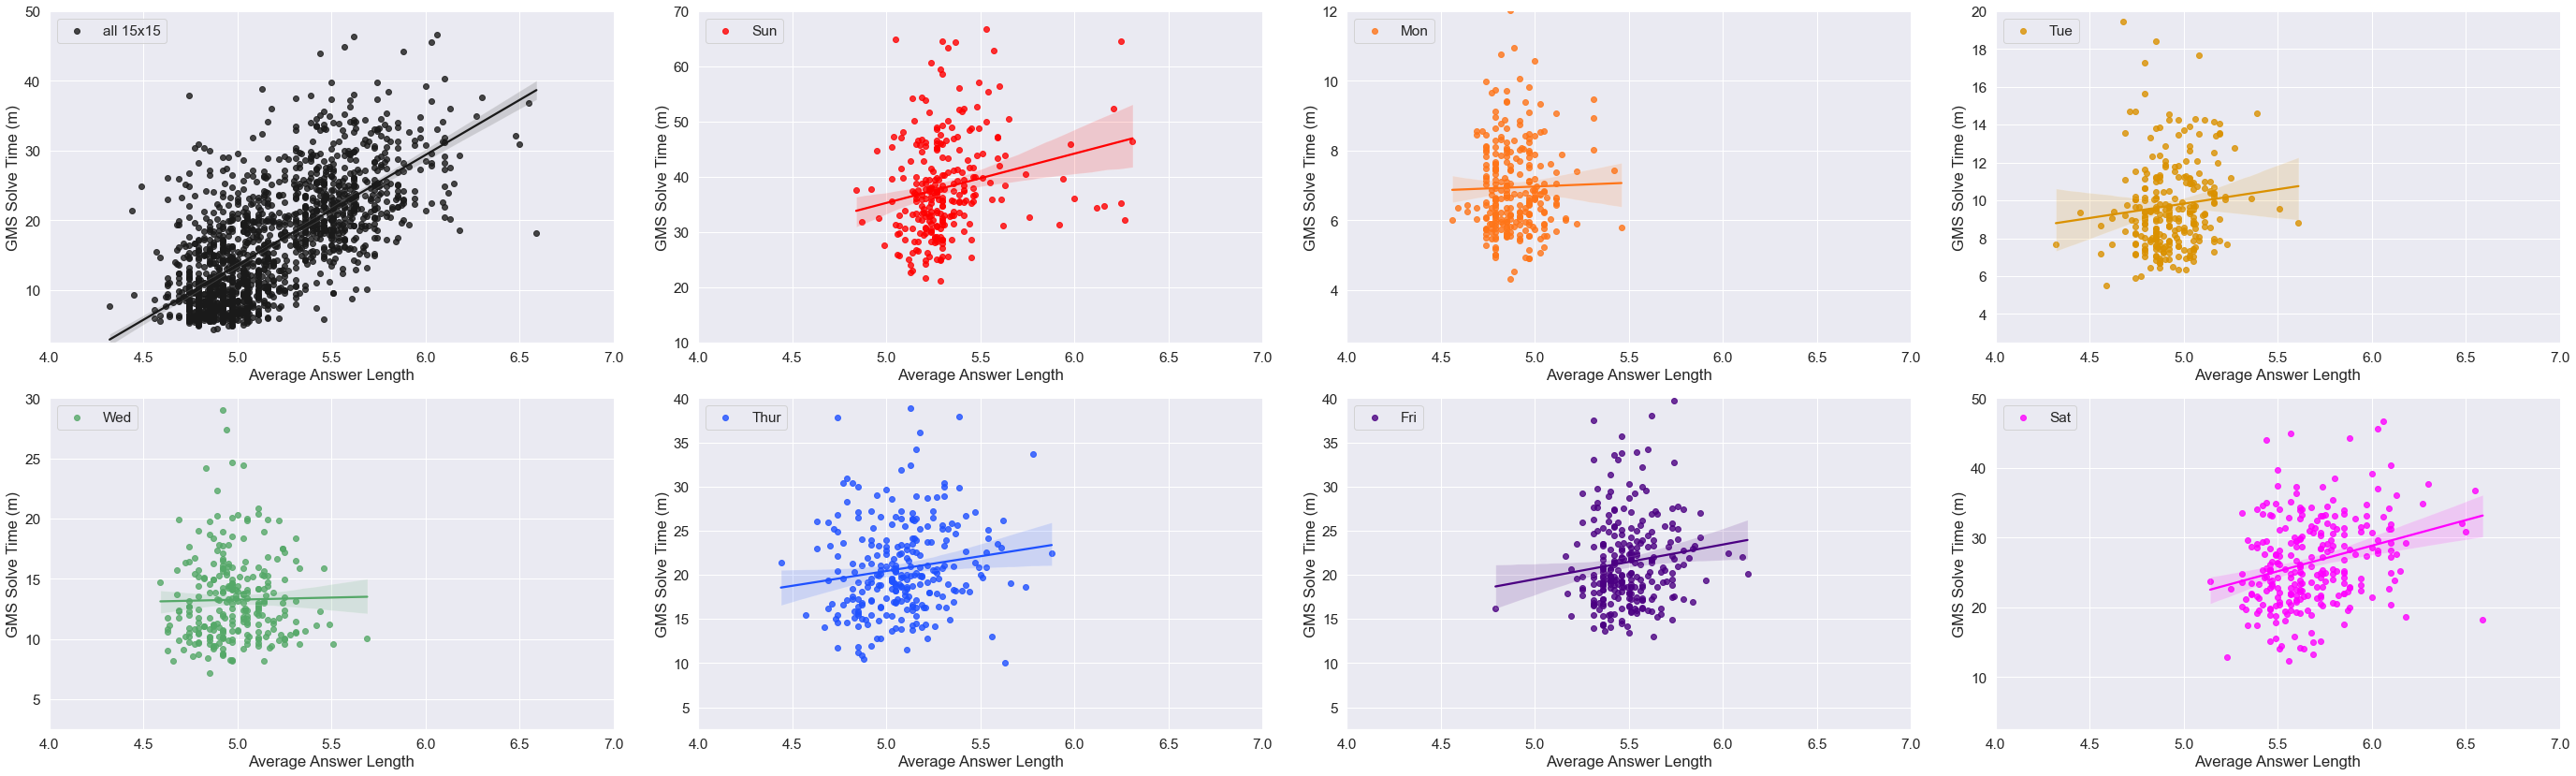

In [78]:
# Average Answer Length vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="AWL", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "Average Answer Length",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((4,7))
p.axes[1].set_xlim((4,7))
p.axes[2].set_xlim((4,7))
p.axes[3].set_xlim((4,7))
p.axes[4].set_xlim((4,7))
p.axes[5].set_xlim((4,7))
p.axes[6].set_xlim((4,7))
p.axes[7].set_xlim((4,7))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [79]:
# Calculate Pearson R for GMST for 15x15 grids for this feature
#GMST_15x15 = GMST_df3.loc[GMST_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['AWL']))

0.6850088126529584


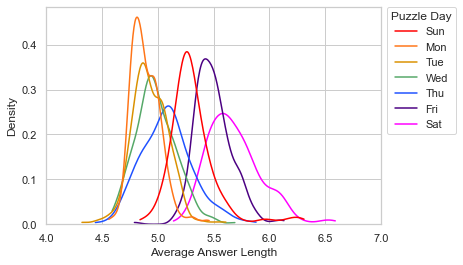

In [80]:
# Density plot of average answer length in puzzles solved by GMS

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "AWL", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(3,7))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(4, 7)
ax.set_xlabel("Average Answer Length")
plt.show()

In [81]:
GMS_df4["AWL"].agg(['min', 'max'])

min    4.32
max    6.59
Name: AWL, dtype: float64

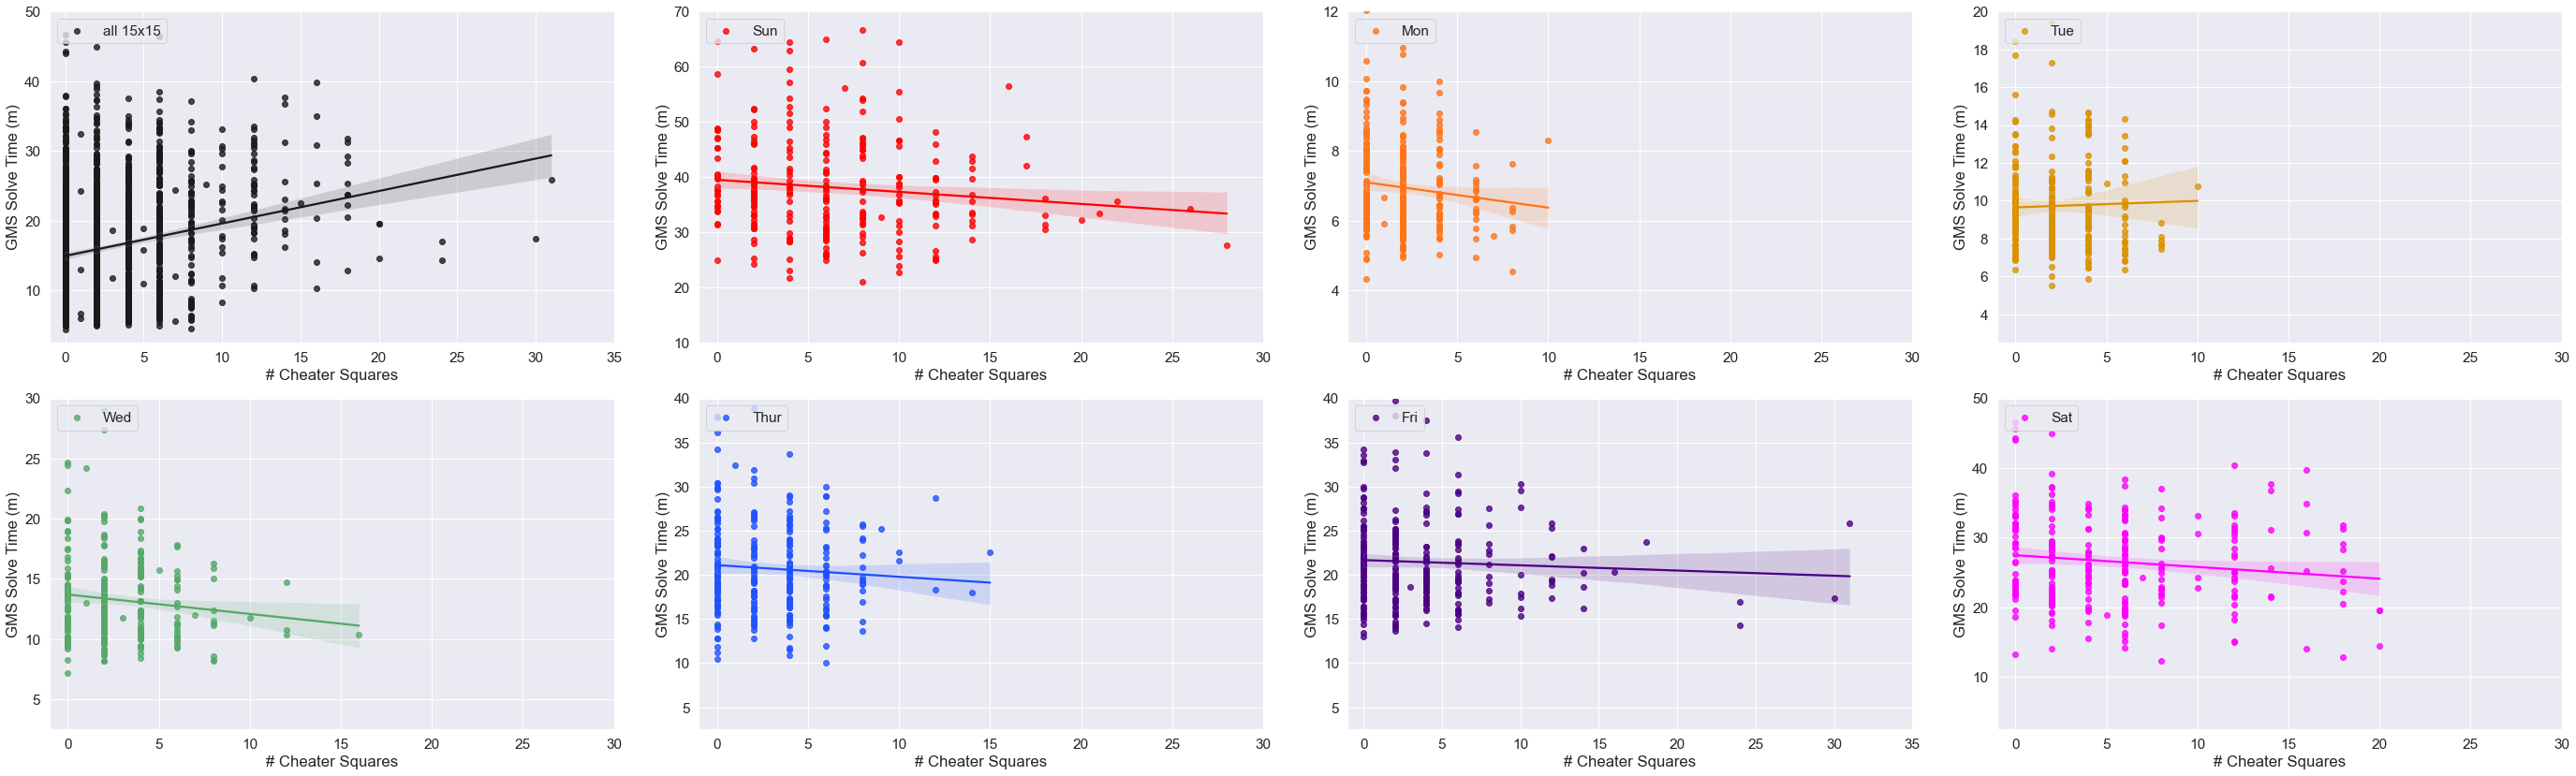

In [82]:
# Cheater Squares vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Cheater_Squares", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Cheater Squares",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,35))
p.axes[1].set_xlim((-1,30))
p.axes[2].set_xlim((-1,30))
p.axes[3].set_xlim((-1,30))
p.axes[4].set_xlim((-1,30))
p.axes[5].set_xlim((-1,30))
p.axes[6].set_xlim((-1,35))
p.axes[7].set_xlim((-1,30))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [83]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Cheater_Squares']))

0.20406450180441016


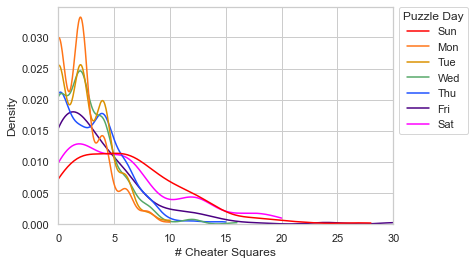

In [84]:
# Density plot of number of cheater squares in puzzles solved by GMS
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Cheater_Squares", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(0,30))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(0, 30)
ax.set_xlabel("# Cheater Squares")
plt.show()

In [85]:
GMS_df4["Cheater_Squares"].agg(['min', 'max'])

min     0
max    31
Name: Cheater_Squares, dtype: int64

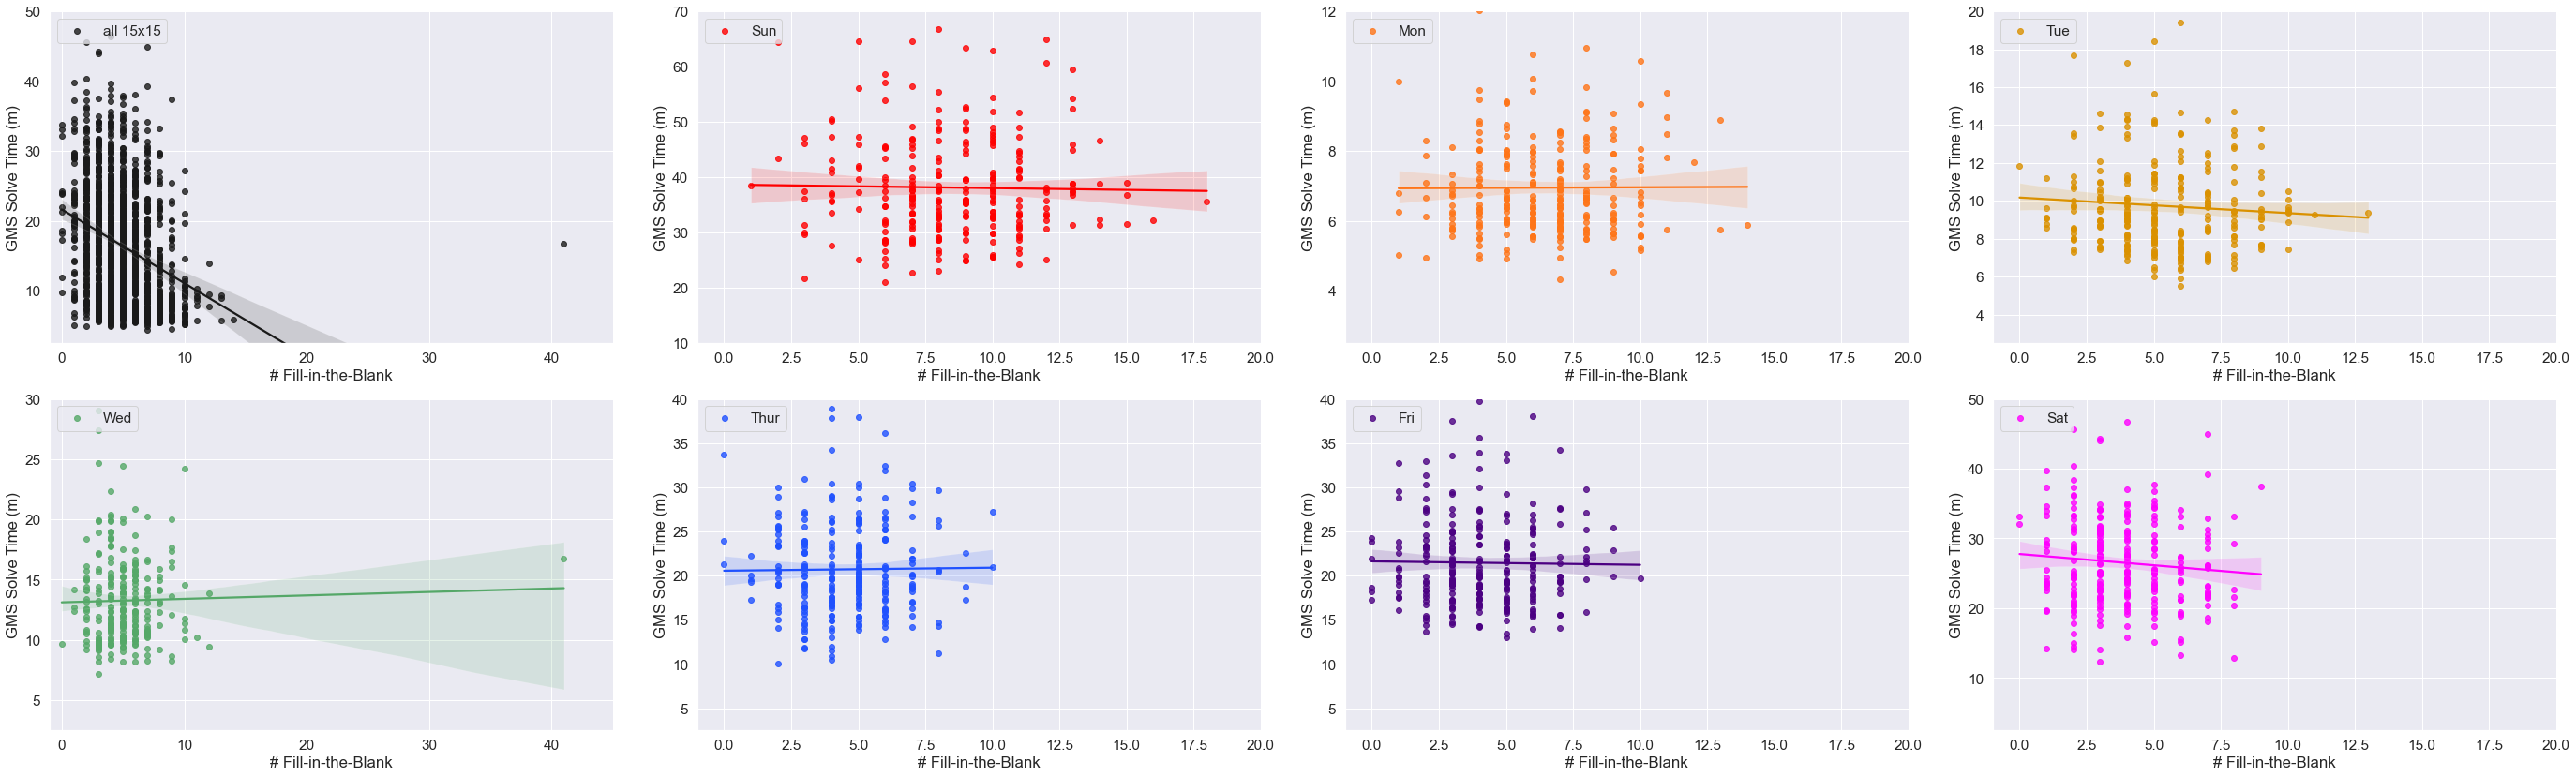

In [86]:
# Fill-in-the-blank clues vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="FITB", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Fill-in-the-Blank",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,45))
p.axes[1].set_xlim((-1,20))
p.axes[2].set_xlim((-1,20))
p.axes[3].set_xlim((-1,20))
p.axes[4].set_xlim((-1,45))
p.axes[5].set_xlim((-1,20))
p.axes[6].set_xlim((-1,20))
p.axes[7].set_xlim((-1,20))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [87]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['FITB']))

-0.3086025864746456


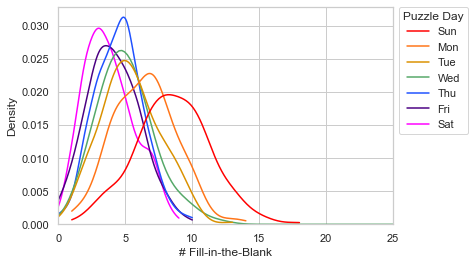

In [88]:
# Density plot of number of fill-in-the-blank clues in puzzles solved by GMS
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "FITB", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(0,45))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(0, 25)
ax.set_xlabel("# Fill-in-the-Blank")
plt.show()

In [89]:
GMS_df4["FITB"].agg(['min', 'max'])

min     0
max    41
Name: FITB, dtype: int64

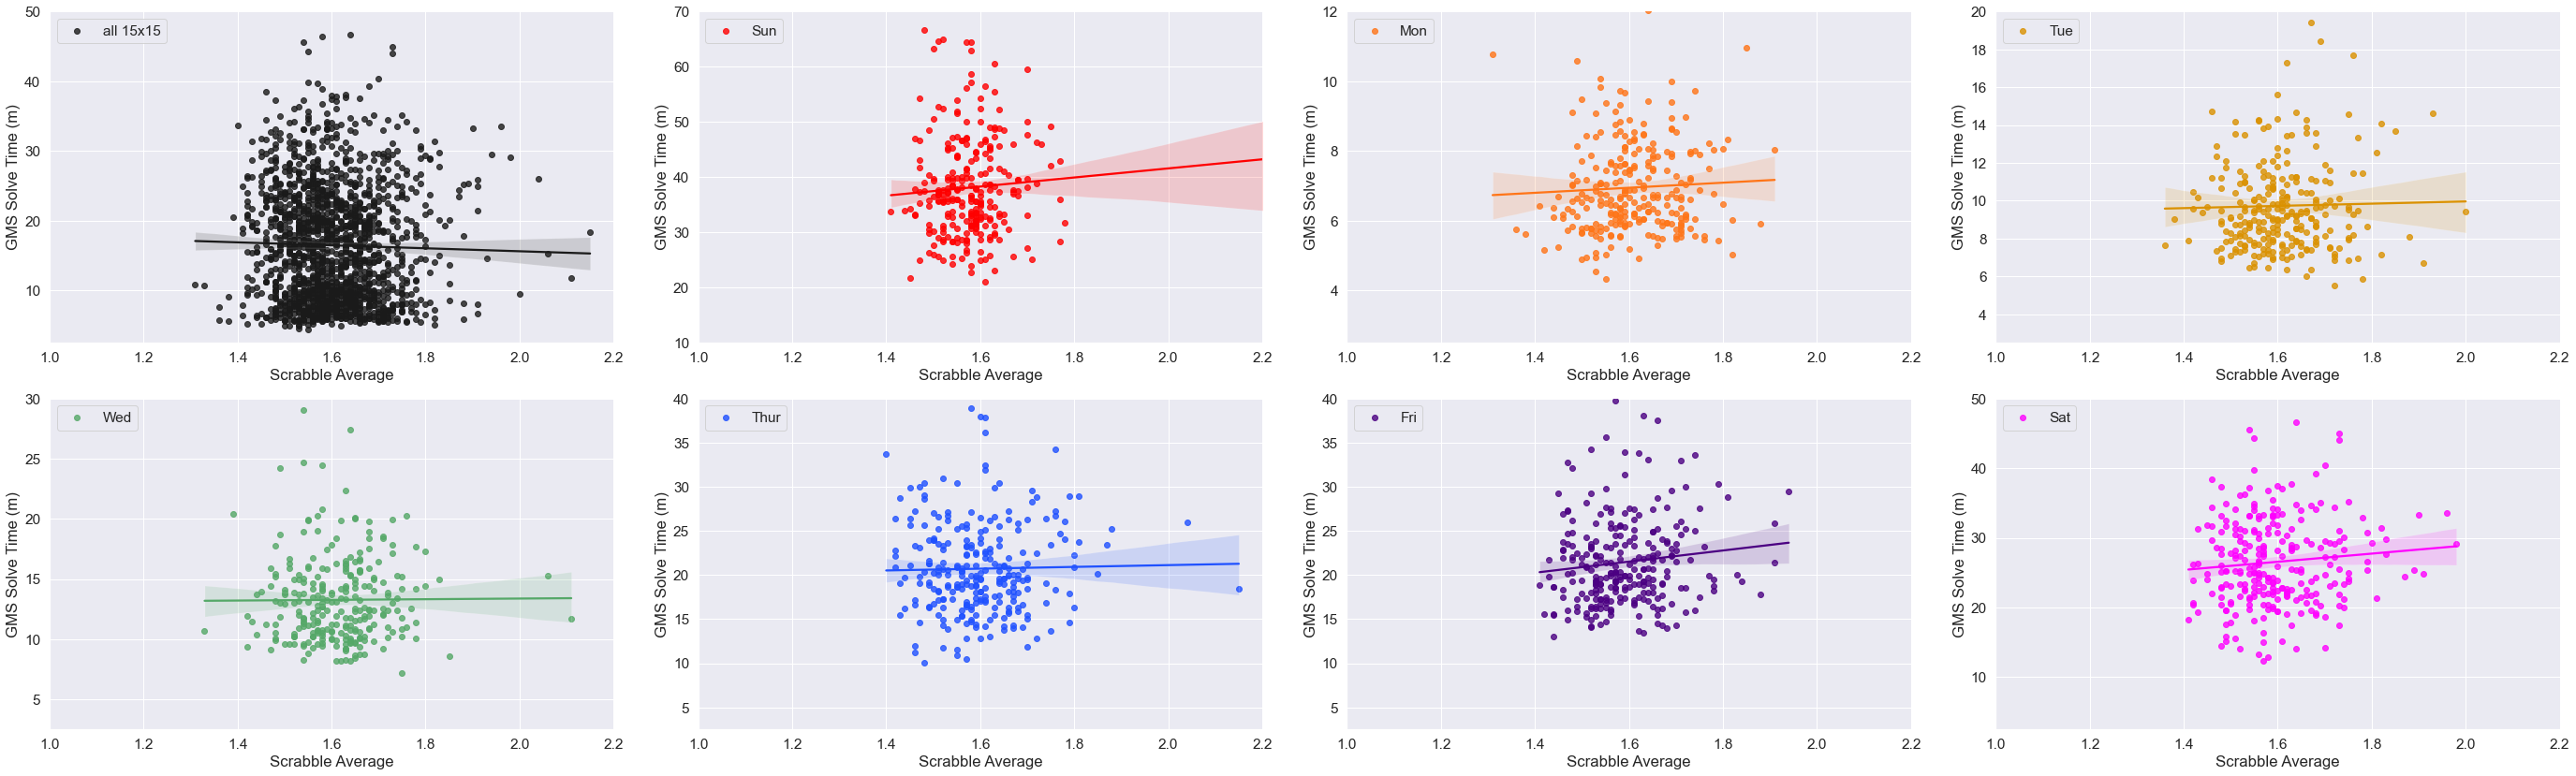

In [90]:
# Scrabble Average vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Scrabble_Avg", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "Scrabble Average",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((1,2.2))
p.axes[1].set_xlim((1,2.2))
p.axes[2].set_xlim((1,2.2))
p.axes[3].set_xlim((1,2.2))
p.axes[4].set_xlim((1,2.2))
p.axes[5].set_xlim((1,2.2))
p.axes[6].set_xlim((1,2.2))
p.axes[7].set_xlim((1,2.2))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [91]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Scrabble_Avg']))

-0.0251114638663794


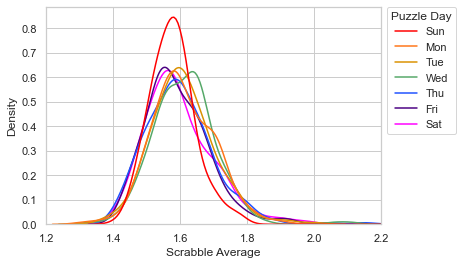

In [92]:
# Density plot of Scrabble Average in puzzles solved by GMS

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Scrabble_Avg", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(1.2, 2.2)
ax.set_xlabel("Scrabble Average")
plt.show()

In [93]:
GMS_df4["Scrabble_Avg"].agg(['min', 'max'])

min    1.31
max    2.45
Name: Scrabble_Avg, dtype: float64

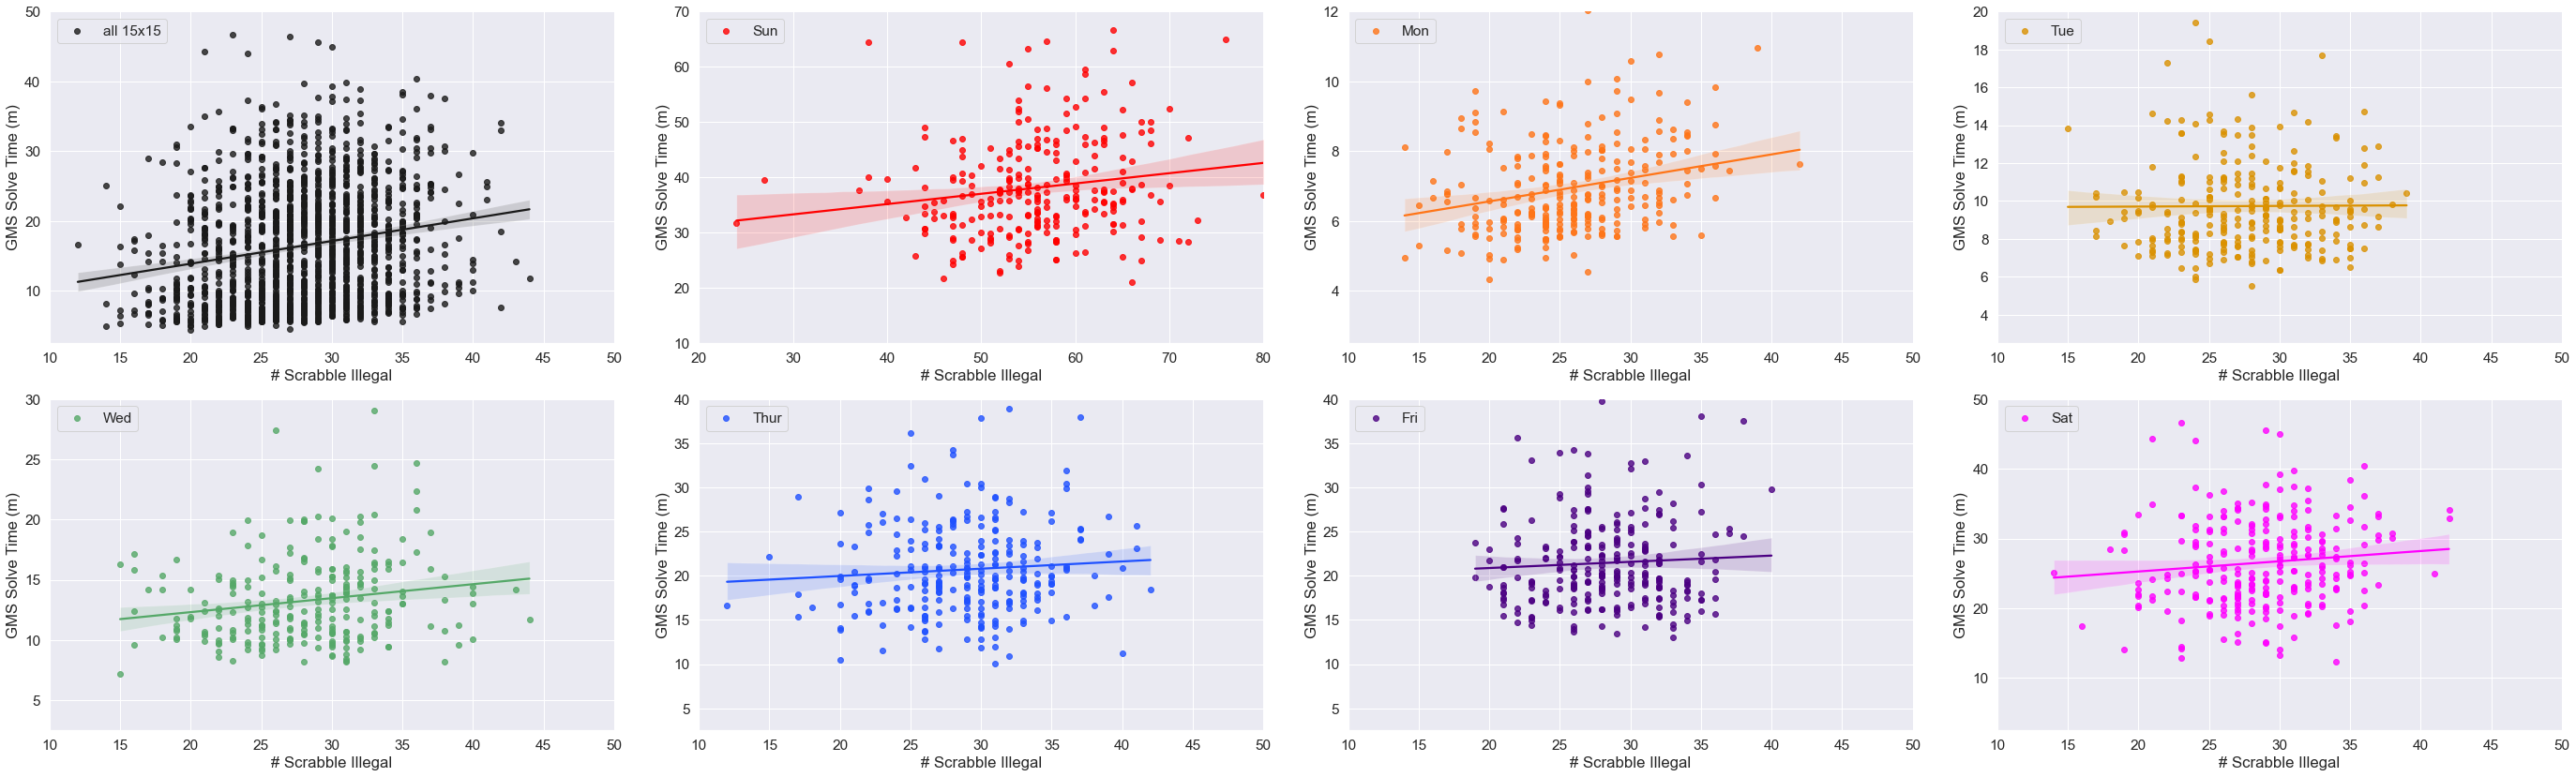

In [94]:
# Scrabble Illegal # vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Scrabble_Illegal", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Scrabble Illegal",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((10,50))
p.axes[1].set_xlim((20,80))
p.axes[2].set_xlim((10,50))
p.axes[3].set_xlim((10,50))
p.axes[4].set_xlim((10,50))
p.axes[5].set_xlim((10,50))
p.axes[6].set_xlim((10,50))
p.axes[7].set_xlim((10,50))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [95]:
# Calculate Pearson R for GMS for 15x15 grids for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Scrabble_Illegal']))

0.1936734458411671


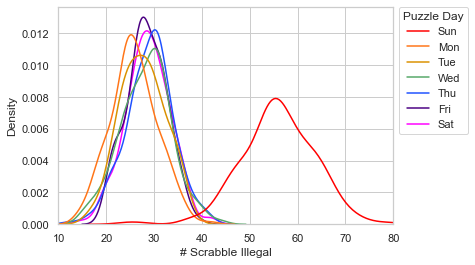

In [96]:
# Density plot of Scrabble Illegal # in puzzles solved by GMS

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Scrabble_Illegal", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(10, 80)
ax.set_xlabel("# Scrabble Illegal")
plt.show()

In [97]:
GMS_df4["Scrabble_Illegal"].agg(['min', 'max'])

min    12
max    80
Name: Scrabble_Illegal, dtype: int64

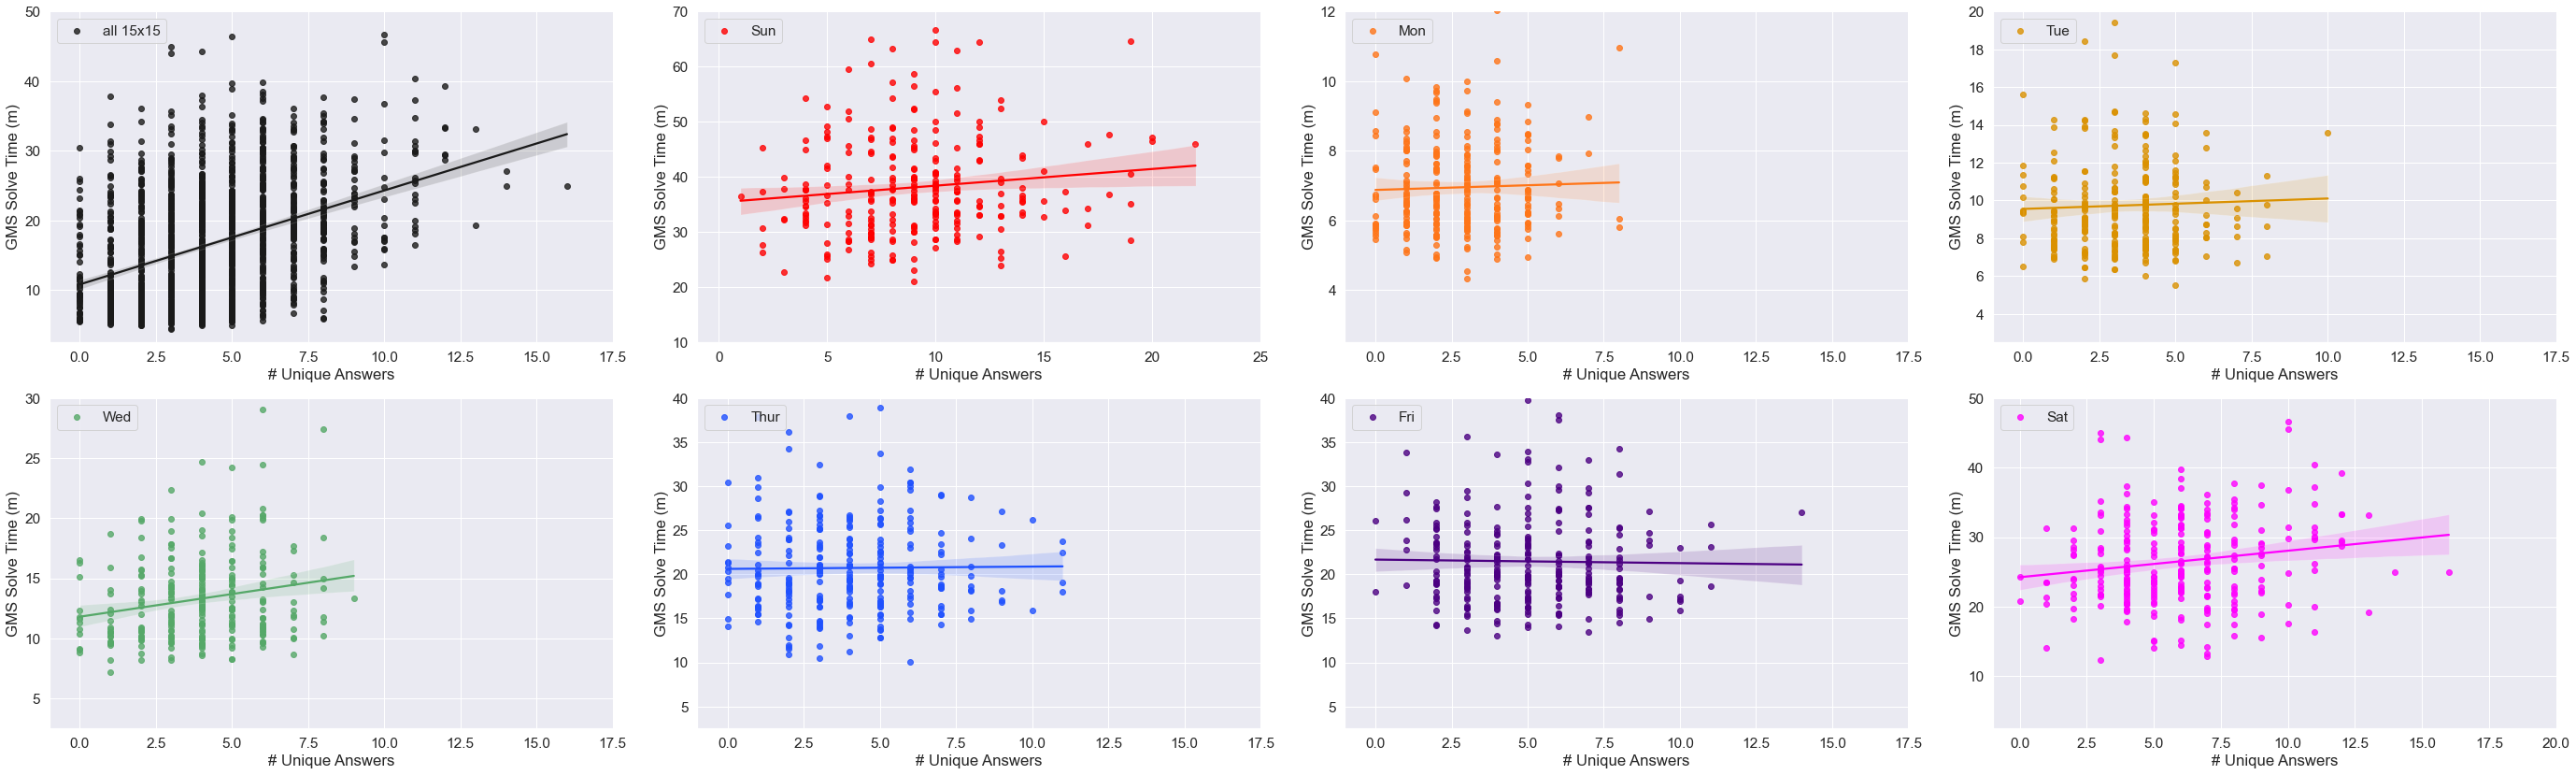

In [98]:
# Unique Answers # # vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Unique_Answers", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Unique Answers",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,17.5))
p.axes[1].set_xlim((-1,25))
p.axes[2].set_xlim((-1,17.5))
p.axes[3].set_xlim((-1,17.5))
p.axes[4].set_xlim((-1,17.5))
p.axes[5].set_xlim((-1,17.5))
p.axes[6].set_xlim((-1,17.5))
p.axes[7].set_xlim((-1,20))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [99]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Unique_Answers']))

0.39735621903850193


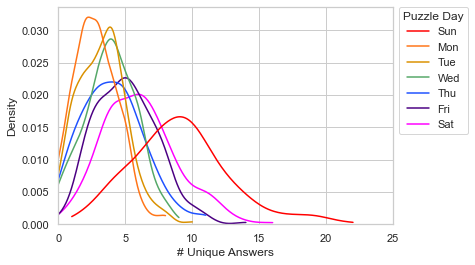

In [100]:
# Density plot of Unique Answers # in puzzles solved by GMS

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Unique_Answers", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(0,25))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(0, 25)
ax.set_xlabel("# Unique Answers")
plt.show()

In [101]:
GMS_df4["Unique_Answers"].agg(['min', 'max'])

min     0
max    22
Name: Unique_Answers, dtype: int64

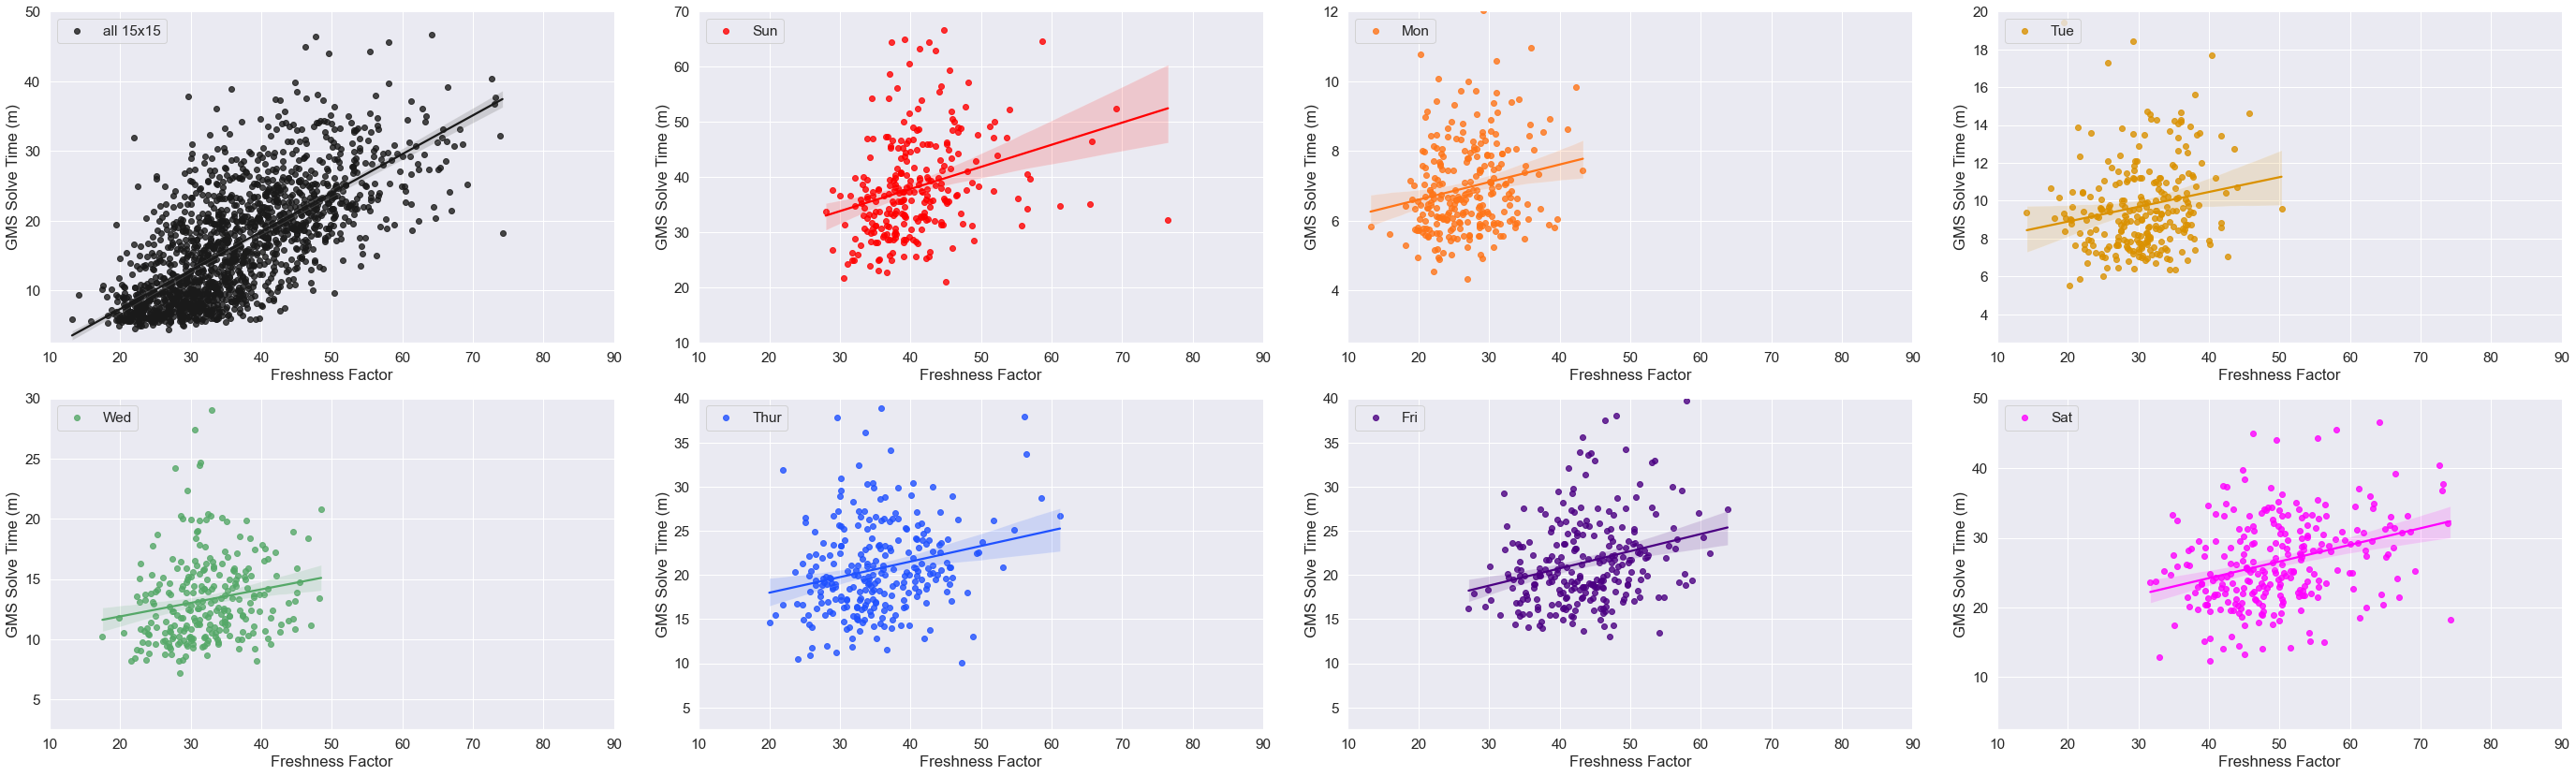

In [102]:
# Freshness Factor vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Freshness_Factor", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "Freshness Factor",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((10,90))
p.axes[1].set_xlim((10,90))
p.axes[2].set_xlim((10,90))
p.axes[3].set_xlim((10,90))
p.axes[4].set_xlim((10,90))
p.axes[5].set_xlim((10,90))
p.axes[6].set_xlim((10,90))
p.axes[7].set_xlim((10,90))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [103]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Freshness_Factor']))

0.6945812824661961


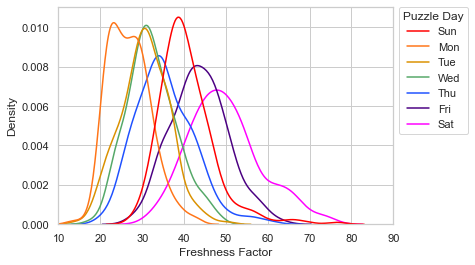

In [104]:
# Density plot of Freshness Factor in puzzles solved by GMS
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Freshness_Factor", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(10, 90)
ax.set_xlabel("Freshness Factor")
plt.show()

In [105]:
GMS_df4["Freshness_Factor"].agg(['min', 'max'])

min    13.2
max    76.5
Name: Freshness_Factor, dtype: float64

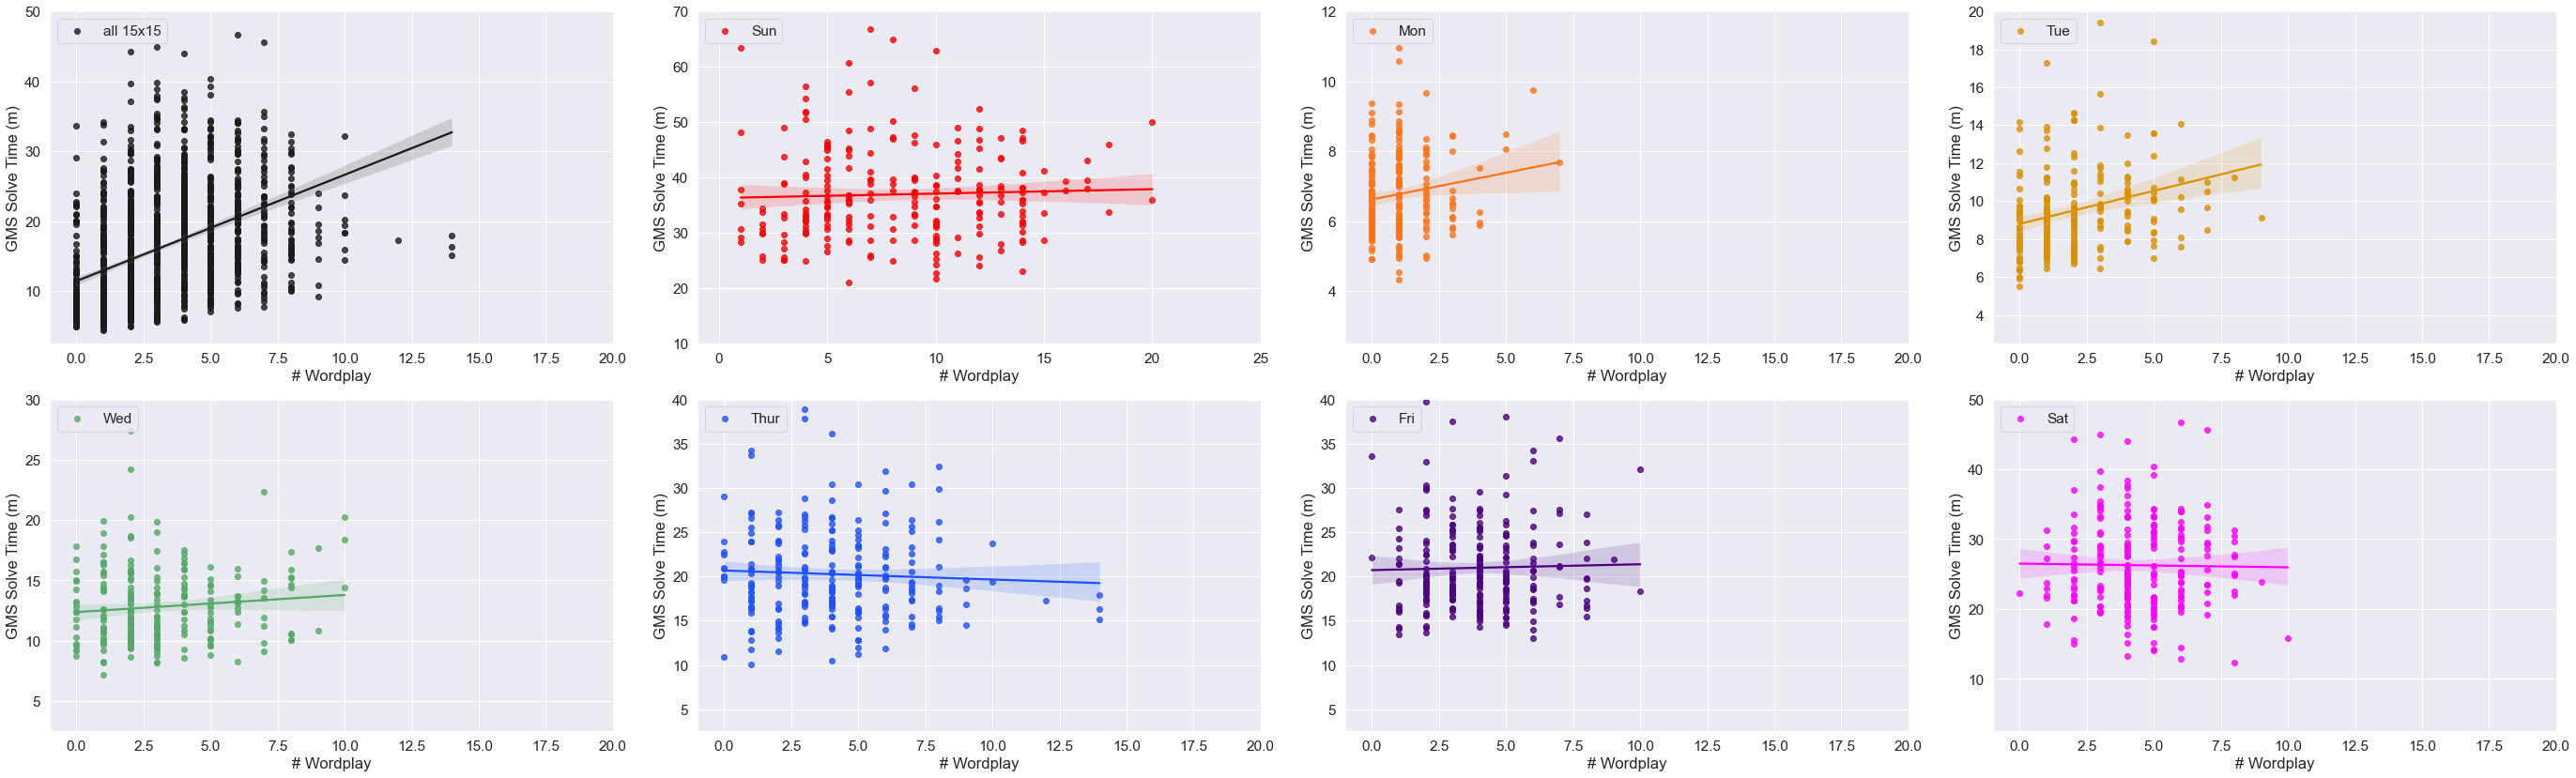

In [106]:
# Wordplay vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Wordplay", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Wordplay",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,20))
p.axes[1].set_xlim((-1,25))
p.axes[2].set_xlim((-1,20))
p.axes[3].set_xlim((-1,20))
p.axes[4].set_xlim((-1,20))
p.axes[5].set_xlim((-1,20))
p.axes[6].set_xlim((-1,20))
p.axes[7].set_xlim((-1,20))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [107]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#GMS_15x15 = GMS_df3.loc[GMS_df3["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Wordplay']))

0.43677793878283194


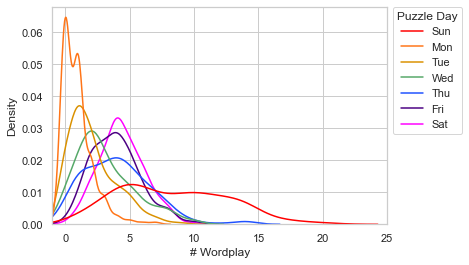

In [108]:
# Density plot of Wordplay in puzzles solved by GMST
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Wordplay", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(-1, 25)
ax.set_xlabel("# Wordplay")
plt.show()

In [109]:
GMS_df4["Wordplay"].agg(['min', 'max'])

min     0.0
max    20.0
Name: Wordplay, dtype: float64

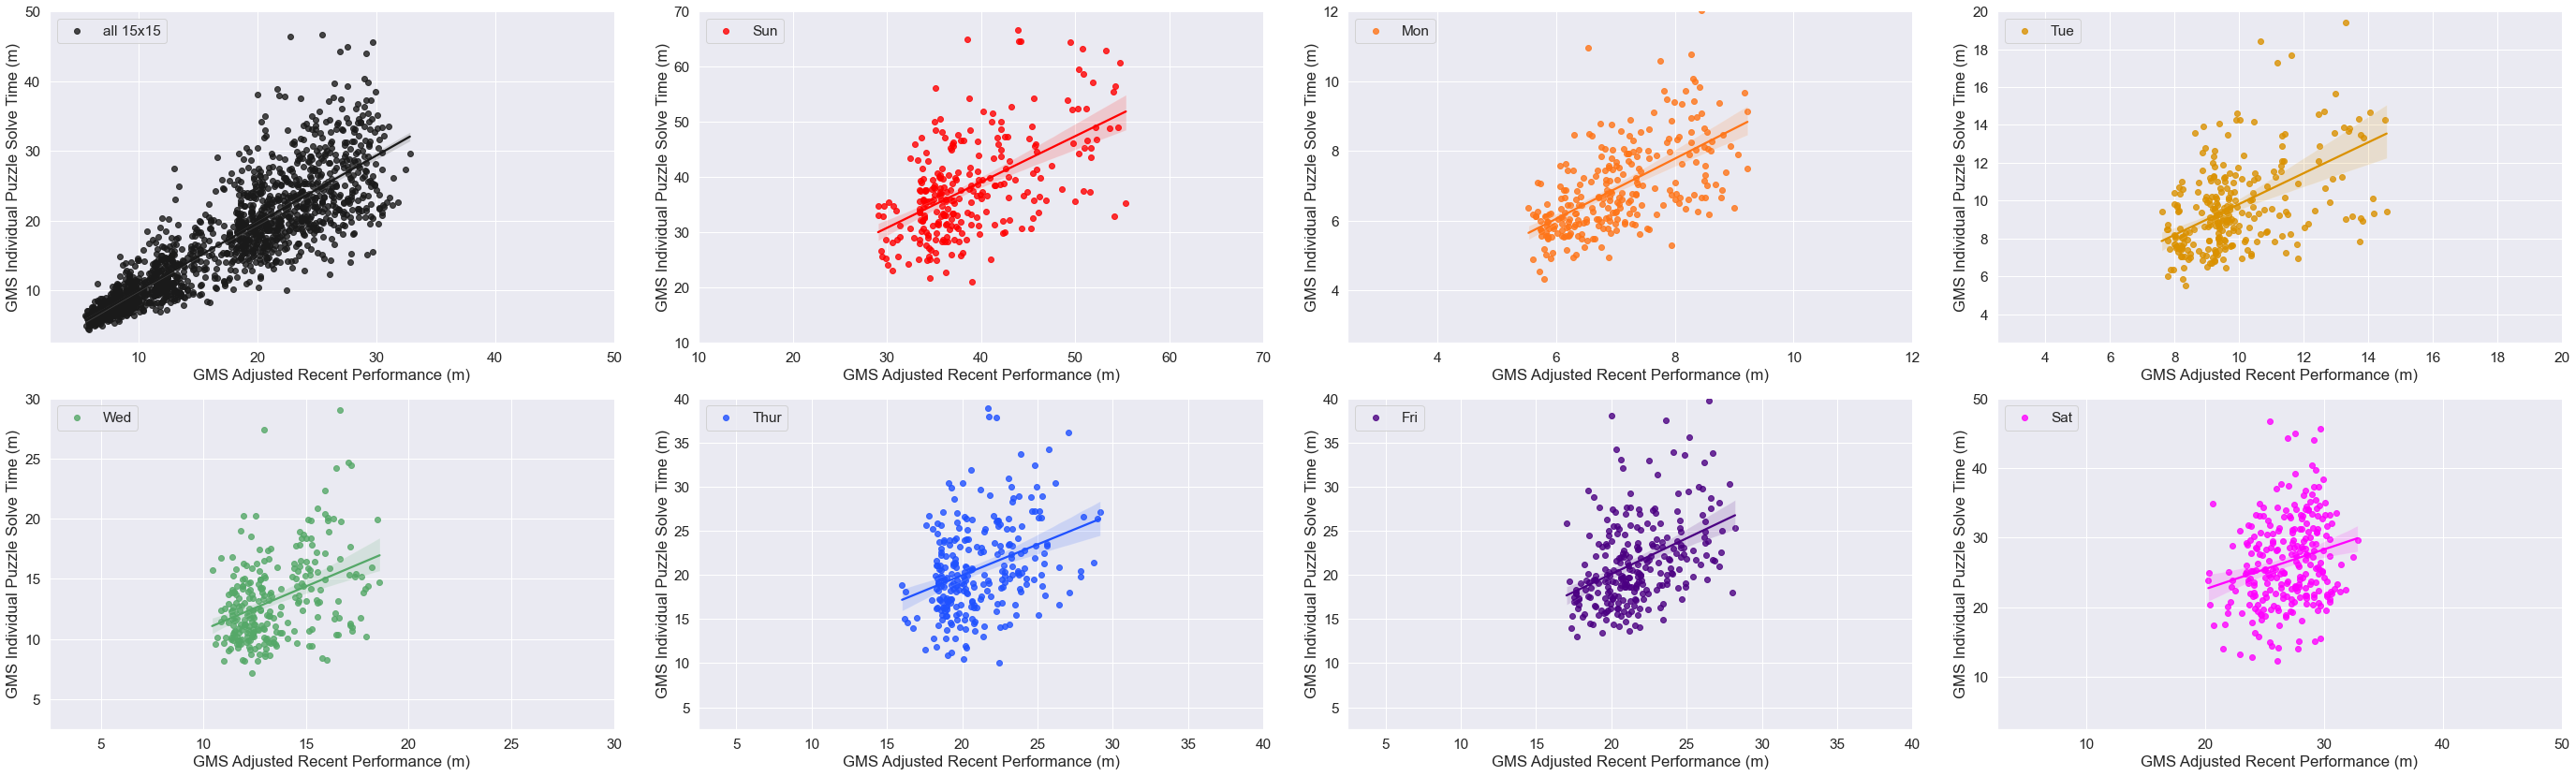

In [110]:
# GMS Recent Past Performance (Time-Decay Weighted Immediately Previous 10 Puzzles Prior to a given puzzle) vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="GMS_pds_l20_dw", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "GMS Adjusted Recent Performance (m)",
    ylabel="GMS Individual Puzzle Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((2.5,50))
p.axes[1].set_xlim((10,70))
p.axes[2].set_xlim((2.5,12))
p.axes[3].set_xlim((2.5,20))
p.axes[4].set_xlim((2.5,30))
p.axes[5].set_xlim((2.5,40))
p.axes[6].set_xlim((2.5,40))
p.axes[7].set_xlim((2.5,50))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [111]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#GMS_15x15 = GMS_df4.loc[GMS_df4["DOW"]!=("Sunday")]

# Correlation for all 15x15 puzzles
print(GMS_15x15['GMST(m)'].corr(GMS_15x15['GMS_pds_l20_dw']))

# # Calculate Pearson R for each puzzle day for this feature
GMS_Sun = GMS_df4.loc[GMS_df4["DOW"]==("Sunday")]
print(GMS_Sun['GMST(m)'].corr(GMS_Sun['GMS_pds_l20_dw']))

GMS_Mon = GMS_df4.loc[GMS_df4["DOW"]==("Monday")]
print(GMS_Mon['GMST(m)'].corr(GMS_Mon['GMS_pds_l20_dw']))

GMS_Tue = GMS_df4.loc[GMS_df4["DOW"]==("Tuesday")]
print(GMS_Tue['GMST(m)'].corr(GMS_Tue['GMS_pds_l20_dw']))

GMS_Wed = GMS_df4.loc[GMS_df4["DOW"]==("Wednesday")]
print(GMS_Wed['GMST(m)'].corr(GMS_Wed['GMS_pds_l20_dw']))

GMS_Thu = GMS_df4.loc[GMS_df4["DOW"]==("Thursday")]
print(GMS_Thu['GMST(m)'].corr(GMS_Thu['GMS_pds_l20_dw']))

GMS_Fri = GMS_df4.loc[GMS_df4["DOW"]==("Friday")]
print(GMS_Fri['GMST(m)'].corr(GMS_Fri['GMS_pds_l20_dw']))

GMS_Sat = GMS_df4.loc[GMS_df4["DOW"]==("Saturday")]
print(GMS_Sat['GMST(m)'].corr(GMS_Sat['GMS_pds_l20_dw']))

0.8629280422036825
0.5546448444626727
0.5850735811203508
0.489577362677706
0.392055585042194
0.34964386336233777
0.40172055162518006
0.22067819132646882


In [ ]:
GMS_15x15.info()

### Data Supplement

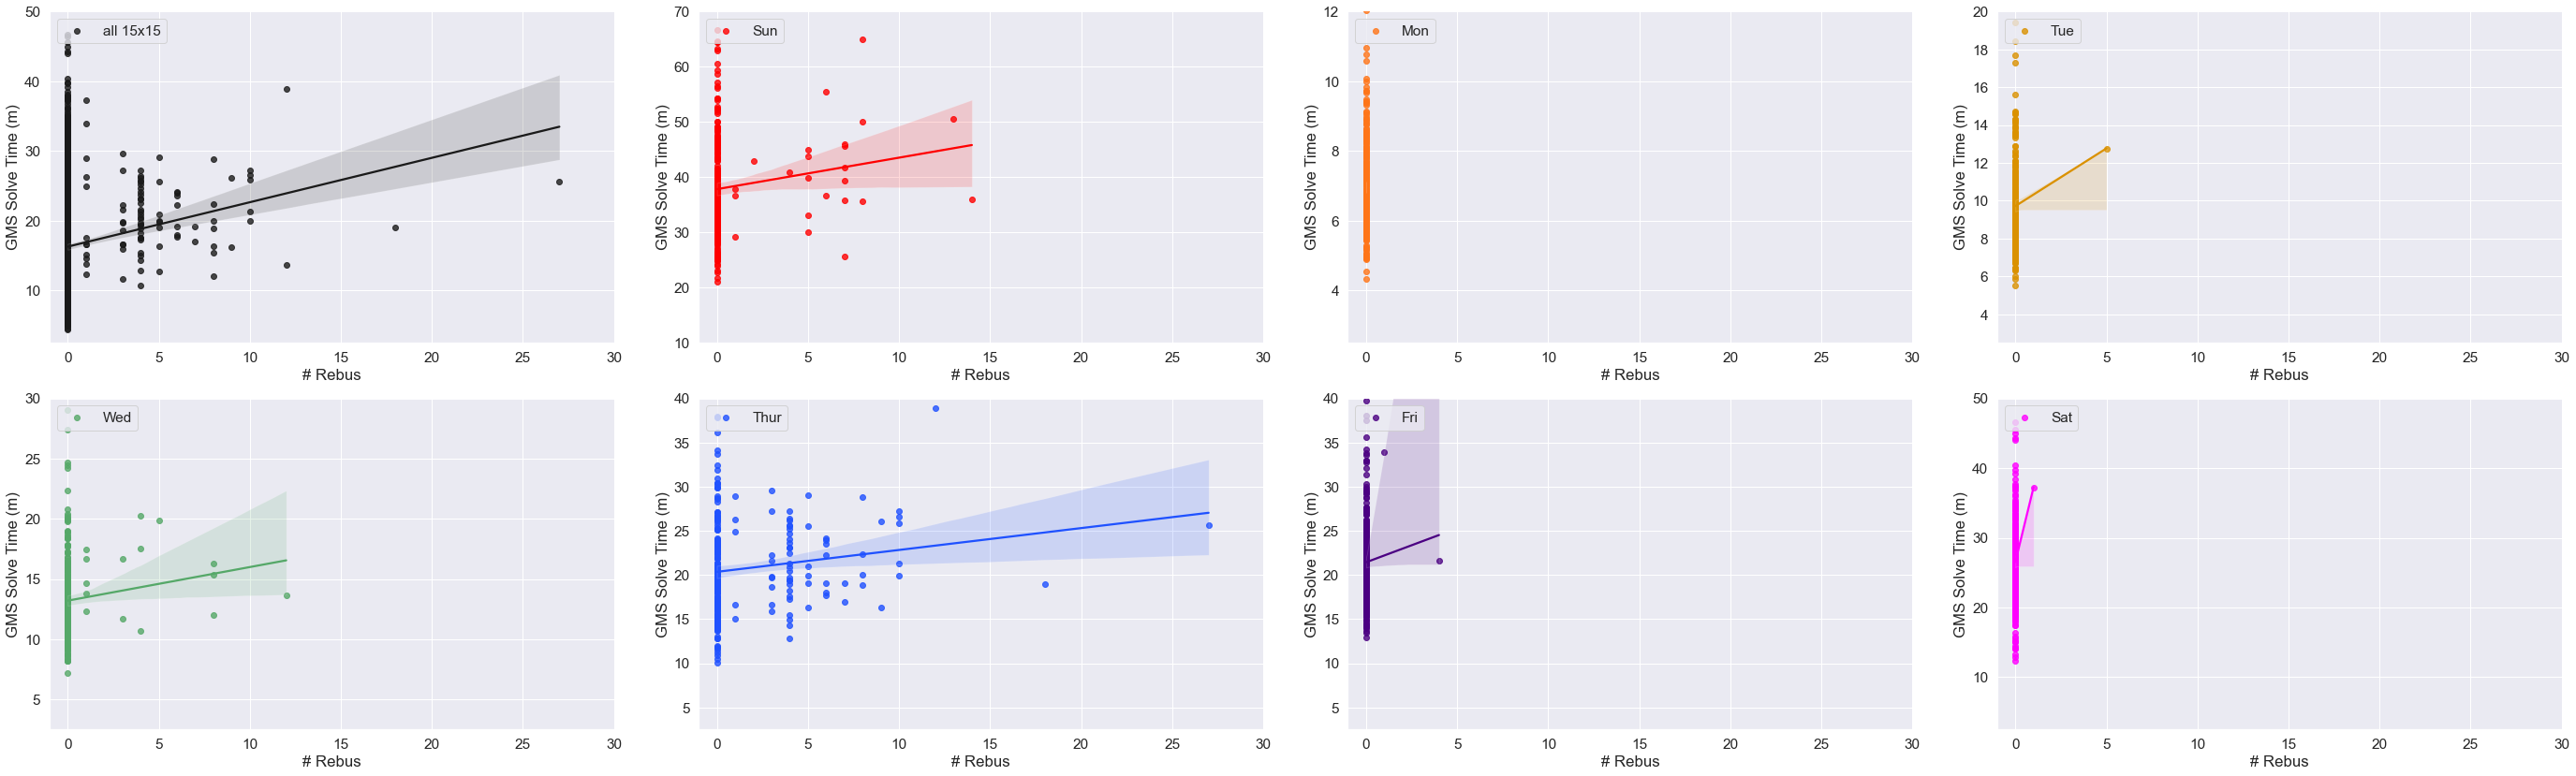

In [143]:
# Rebus vs GMS Raw Solve Times
#Supp. Fig. 2

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Rebus_Count", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Rebus",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,30))
p.axes[1].set_xlim((-1,30))
p.axes[2].set_xlim((-1,30))
p.axes[3].set_xlim((-1,30))
p.axes[4].set_xlim((-1,30))
p.axes[5].set_xlim((-1,30))
p.axes[6].set_xlim((-1,30))
p.axes[7].set_xlim((-1,30))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [144]:
# Calculate Pearson R for 15x15 grids for GMST for this feature
#GMS_15x15 = GMS_df4.loc[GMS_df4["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Rebus_Count']))

# Calculate Pearson R for each puzzle day for this feature
GMS_Sun = GMS_df4.loc[GMS_df4["DOW"]==("Sunday")]
print(GMS_Sun['GMST(m)'].corr(GMS_Sun['Rebus_Count']))

GMS_Mon = GMS_df4.loc[GMS_df4["DOW"]==("Monday")]
print(GMS_Mon['GMST(m)'].corr(GMS_Mon['Rebus_Count']))

GMS_Tue = GMS_df4.loc[GMS_df4["DOW"]==("Tuesday")]
print(GMS_Tue['GMST(m)'].corr(GMS_Tue['Rebus_Count']))

GMS_Wed = GMS_df4.loc[GMS_df4["DOW"]==("Wednesday")]
print(GMS_Wed['GMST(m)'].corr(GMS_Wed['Rebus_Count']))

GMS_Thu = GMS_df4.loc[GMS_df4["DOW"]==("Thursday")]
print(GMS_Thu['GMST(m)'].corr(GMS_Thu['Rebus_Count']))

GMS_Fri = GMS_df4.loc[GMS_df4["DOW"]==("Friday")]
print(GMS_Fri['GMST(m)'].corr(GMS_Fri['Rebus_Count']))

GMS_Sat = GMS_df4.loc[GMS_df4["DOW"]==("Saturday")]
print(GMS_Sat['GMST(m)'].corr(GMS_Sat['Rebus_Count']))

0.1144460883676391
0.12364523549536616
nan
0.07146674590767477
0.09978709605931896
0.15028392238147592
0.038373907334346764
0.10180222487566246


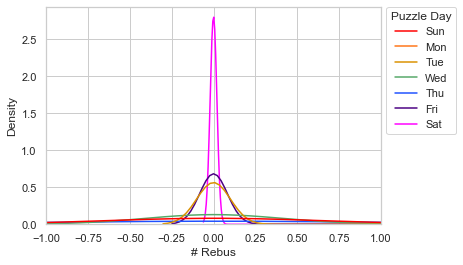

In [145]:
# Density plot of Rebus Count in puzzles solved by GMS
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

GMS_df4 = GMS_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=GMS_df4, x = "Rebus_Count", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(-1, 1)
ax.set_xlabel("# Rebus")
plt.show()

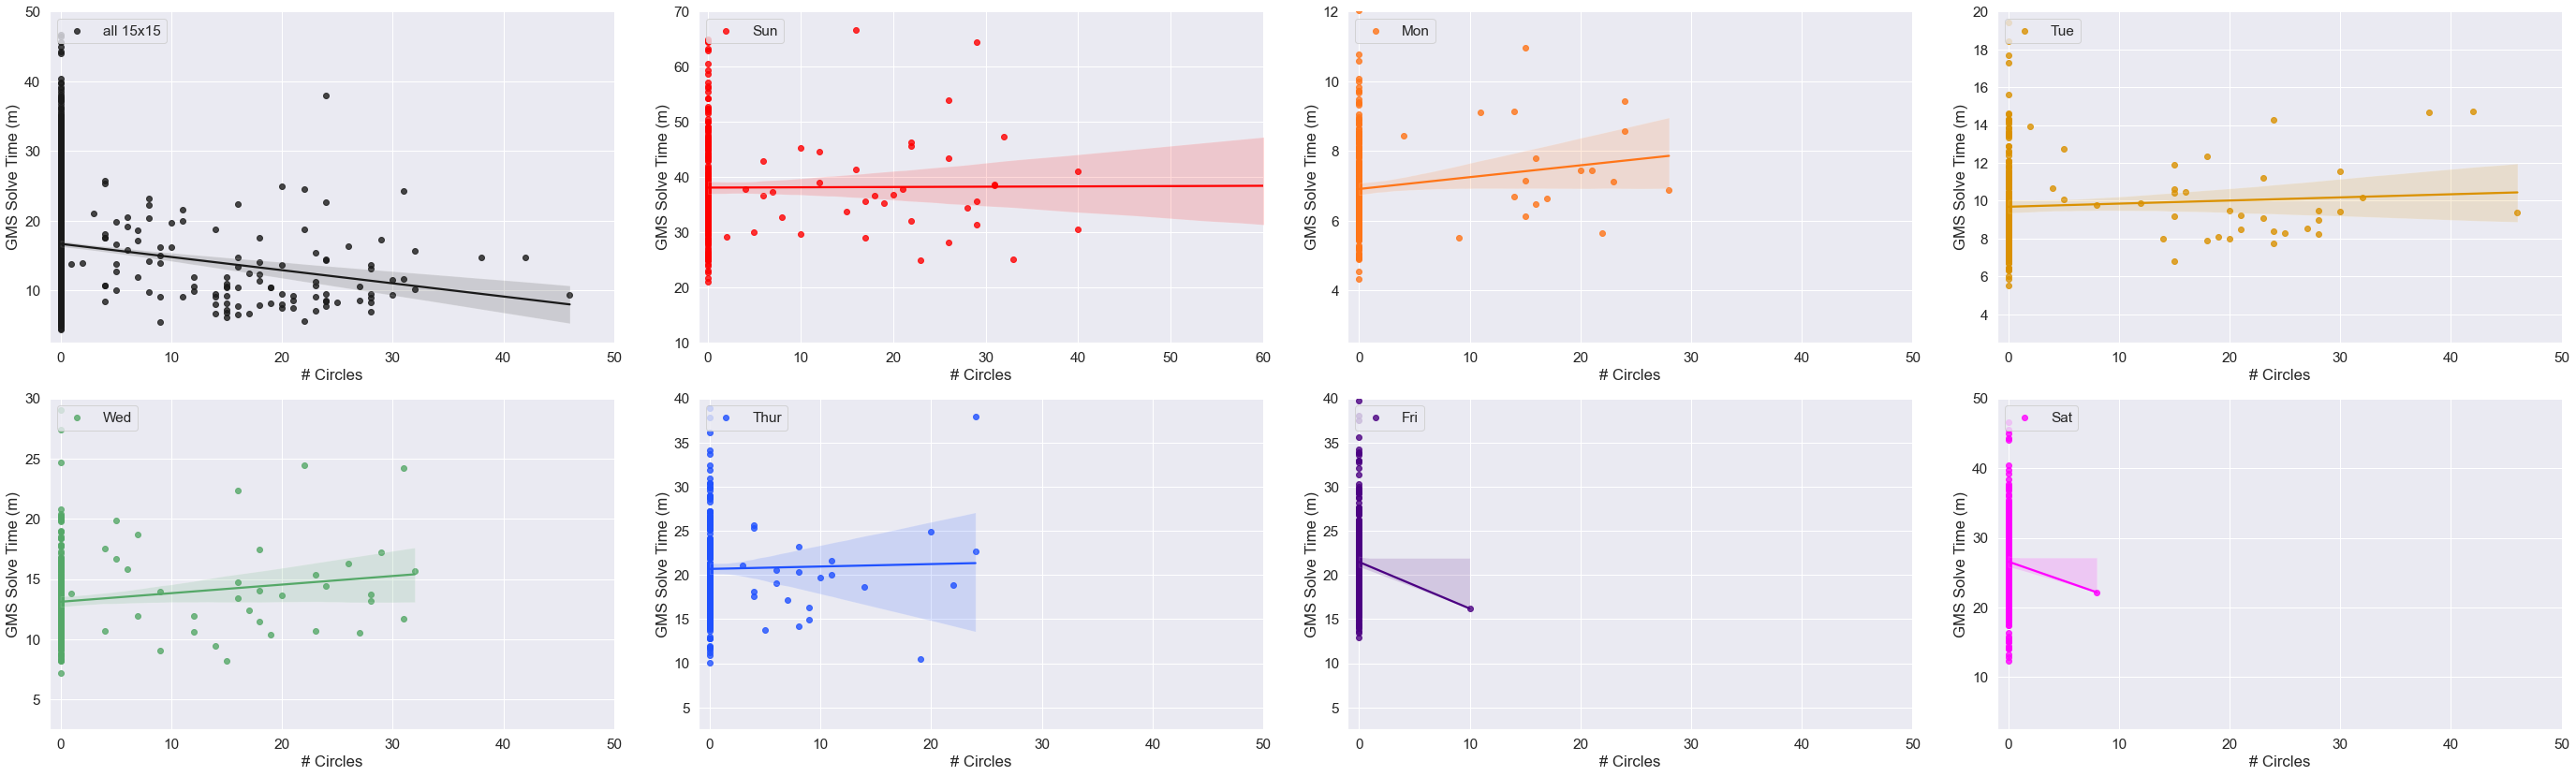

In [146]:
# Circles vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Circle_Count", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Circles",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,50))
p.axes[1].set_xlim((-1,60))
p.axes[2].set_xlim((-1,50))
p.axes[3].set_xlim((-1,50))
p.axes[4].set_xlim((-1,50))
p.axes[5].set_xlim((-1,50))
p.axes[6].set_xlim((-1,50))
p.axes[7].set_xlim((-1,50))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [147]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#GMS_15x15 = GMS_df4.loc[GMS_df4["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Circle_Count']))

# Calculate Pearson R for each puzzle day for this feature
GMS_Sun = GMS_df4.loc[GMS_df4["DOW"]==("Sunday")]
print(GMS_Sun['GMST(m)'].corr(GMS_Sun['Circle_Count']))

GMS_Mon = GMS_df4.loc[GMS_df4["DOW"]==("Monday")]
print(GMS_Mon['GMST(m)'].corr(GMS_Mon['Circle_Count']))

GMS_Tue = GMS_df4.loc[GMS_df4["DOW"]==("Tuesday")]
print(GMS_Tue['GMST(m)'].corr(GMS_Tue['Circle_Count']))

GMS_Wed = GMS_df4.loc[GMS_df4["DOW"]==("Wednesday")]
print(GMS_Wed['GMST(m)'].corr(GMS_Wed['Circle_Count']))

GMS_Thu = GMS_df4.loc[GMS_df4["DOW"]==("Thursday")]
print(GMS_Thu['GMST(m)'].corr(GMS_Thu['Circle_Count']))

GMS_Fri = GMS_df4.loc[GMS_df4["DOW"]==("Friday")]
print(GMS_Fri['GMST(m)'].corr(GMS_Fri['Circle_Count']))

GMS_Sat = GMS_df4.loc[GMS_df4["DOW"]==("Saturday")]
print(GMS_Sat['GMST(m)'].corr(GMS_Sat['Circle_Count']))

-0.11413923704053766
0.005293968213851499
0.11414201556047279
0.05059060252220373
0.13364239371213296
0.018848869463312126
-0.06380536710810521
-0.04191261218876096


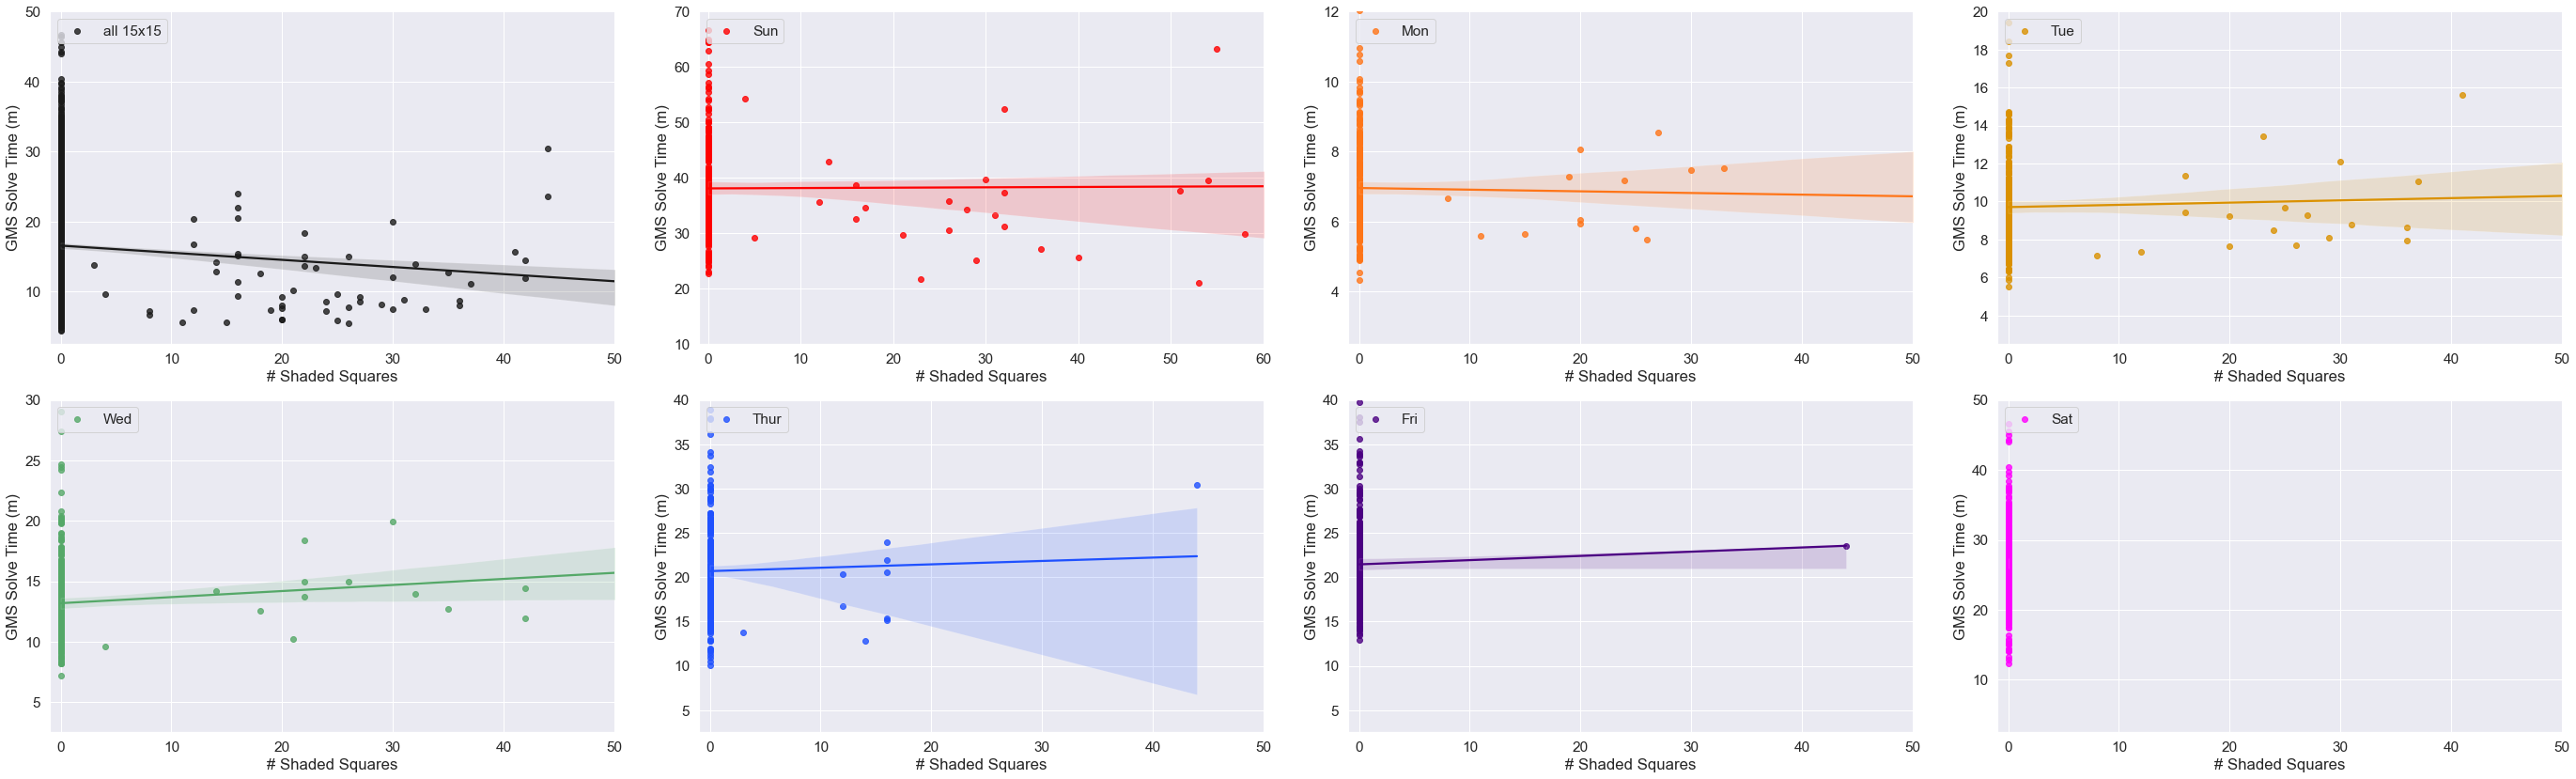

In [148]:
# Shaded Squares vs GMS Raw Solve Times

GMS_df4a = GMS_df4a.sort_values(by=['DOW_num'], ascending = True)

GMS_df4a['plot_seq_map'] = GMS_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=GMS_df4a, x="Shade_Count", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Shaded Squares",
    ylabel="GMS Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,50))
p.axes[1].set_xlim((-1,60))
p.axes[2].set_xlim((-1,50))
p.axes[3].set_xlim((-1,50))
p.axes[4].set_xlim((-1,50))
p.axes[5].set_xlim((-1,50))
p.axes[6].set_xlim((-1,50))
p.axes[7].set_xlim((-1,50))

p.axes[0].set_ylim((2.5,50))
p.axes[1].set_ylim((10,70))
p.axes[2].set_ylim((2.5,12))
p.axes[3].set_ylim((2.5,20))
p.axes[4].set_ylim((2.5,30))
p.axes[5].set_ylim((2.5,40))
p.axes[6].set_ylim((2.5,40))
p.axes[7].set_ylim((2.5,50))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [149]:
# Calculate Pearson R for GMS for 15x15 grids for this feature
#GMS_15x15 = GMS_df4.loc[GMS_df4["DOW"]!=("Sunday")]

print(GMS_15x15['GMST(m)'].corr(GMS_15x15['Shade_Count']))

# Calculate Pearson R for each puzzle day for this feature
GMS_Sun = GMS_df4.loc[GMS_df4["DOW"]==("Sunday")]
print(GMS_Sun['GMST(m)'].corr(GMS_Sun['Shade_Count']))

GMS_Mon = GMS_df4.loc[GMS_df4["DOW"]==("Monday")]
print(GMS_Mon['GMST(m)'].corr(GMS_Mon['Shade_Count']))

GMS_Tue = GMS_df4.loc[GMS_df4["DOW"]==("Tuesday")]
print(GMS_Tue['GMST(m)'].corr(GMS_Tue['Shade_Count']))

GMS_Wed = GMS_df4.loc[GMS_df4["DOW"]==("Wednesday")]
print(GMS_Wed['GMST(m)'].corr(GMS_Wed['Shade_Count']))

GMS_Thu = GMS_df4.loc[GMS_df4["DOW"]==("Thursday")]
print(GMS_Thu['GMST(m)'].corr(GMS_Thu['Shade_Count']))

GMS_Fri = GMS_df4.loc[GMS_df4["DOW"]==("Friday")]
print(GMS_Fri['GMST(m)'].corr(GMS_Fri['Shade_Count']))

GMS_Sat = GMS_df4.loc[GMS_df4["DOW"]==("Saturday")]
print(GMS_Sat['GMST(m)'].corr(GMS_Sat['Shade_Count']))

-0.08555179547881017
0.014253740612630217
-0.041996761523812785
0.03451591342227055
0.10965840568159023
0.02739544726523145
0.02538644920117826
nan
